# Data Science Guide

## Data Source Connections

### Microsoft SQL

In [ ]:
import pymssql

server = getenv("xxx.xxx.xx.xx")
user = getenv("username")
password = getenv("password")

conn = pymssql.connect(server, user, password, "tempdb")
cursor = conn.cursor()

cursor.execute("""
                        IF OBJECT_ID('persons', 'U') IS NOT NULL
                            DROP TABLE persons
                        CREATE TABLE persons (
                            id INT NOT NULL,
                            name VARCHAR(100),
                            salesrep VARCHAR(100),
                            PRIMARY KEY(id)
                        )
"""
)


cursor.executemany(
    "INSERT INTO persons VALUES (%d, %s, %s)",
    [(1, 'John Smith', 'John Doe'),
     (2, 'Jane Doe', 'Joe Dog'),
     (3, 'Mike T.', 'Sarah H.')])


conn.commit()

cursor.execute('SELECT * FROM persons')
row = cursor.fetchone()
while row:
    print("ID=%d, Name=%s" % (row[0], row[1]))
    row = cursor.fetchone()

conn.close()

### TM1 Connection

In [ ]:
from TM1py import TM1Service
ADDRESS = 'xxx.xxx.xx.xx'
PORT = 12354
USER = 'admin'
PASSWORD = 'apple'
SSL = False
DECODE_B64 = False

CUBE = ""
VIEW = ""

with TM1Service(address=ADDRESS, port=PORT, user=USER, password=PASSWORD, ssl=SSL, decode_b64=DECODE_B64) as tm1:
    df = tm1.cubes.cells.execute_view_dataframe_pivot(
        cube_name=CUBE,
        view_name=VIEW)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### Pandas Data Frame 

In [2]:
df = pd.read_csv(r'kc_house_data.csv', error_bad_lines=False)
df.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650


In [196]:
X = df[["bedrooms","sqft_living","floors","bathrooms"]]
y = df["price"]
#y = df["waterfront"]
#y = df["grade"]

In [197]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(14480, 4)
(14480,)
(7133, 4)
(7133,)


# Supervised Algorithms

# Regression

## Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score


linreg = LinearRegression(
    fit_intercept=True,
    normalize=False,
    copy_X=True,
    n_jobs=None,
)

linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

print("*************************************| Error / Accuracy Metrics |************************************")
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score :",explained_variance_score(y_test, y_pred)) 
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score Uniform Average :",explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print("--------------------------------------------------------------------------------------------------")
print("Maximum Error (ME) :",max_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Absolute Error (MAE) :",mean_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Error (MSE) :",mean_squared_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Log Error (MSLE) :",mean_squared_log_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Median Absolute Error (MedAE) :",median_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("R2 Score (R2) :",r2_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")

*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Explained Variance Score : 0.5025801802472102
--------------------------------------------------------------------------------------------------
Explained Variance Score Uniform Average : 0.5025801802472102
--------------------------------------------------------------------------------------------------
Maximum Error (ME) : 4190853.198694827
--------------------------------------------------------------------------------------------------
Mean Absolute Error (MAE) : 174286.3120128402
--------------------------------------------------------------------------------------------------
Mean Squared Error (MSE) : 74492754485.58958
--------------------------------------------------------------------------------------------------
Mean Squared Log Error (MSLE) : 0.1582498451241946
---------------

## Linear Ridge Regression

In [7]:
from sklearn import linear_model
from sklearn import metrics

linrid = linear_model.Ridge(
    alpha=1.0,
    fit_intercept=True,
    normalize=False,
    copy_X=True,
    max_iter=None,
    tol=0.001,
    solver='auto',
    random_state=None,
)
linrid.fit(X_train, y_train)

y_pred = linrid.predict(X_test)

print("*************************************| Error / Accuracy Metrics |************************************")
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score :",explained_variance_score(y_test, y_pred)) 
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score Uniform Average :",explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print("--------------------------------------------------------------------------------------------------")
print("Maximum Error (ME) :",max_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Absolute Error (MAE) :",mean_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Error (MSE) :",mean_squared_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Log Error (MSLE) :",mean_squared_log_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Median Absolute Error (MedAE) :",median_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("R2 Score (R2) :",r2_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")

*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Explained Variance Score : 0.5025798594802964
--------------------------------------------------------------------------------------------------
Explained Variance Score Uniform Average : 0.5025798594802964
--------------------------------------------------------------------------------------------------
Maximum Error (ME) : 4190861.3067016546
--------------------------------------------------------------------------------------------------
Mean Absolute Error (MAE) : 174286.19780452116
--------------------------------------------------------------------------------------------------
Mean Squared Error (MSE) : 74492802611.21843
--------------------------------------------------------------------------------------------------
Mean Squared Log Error (MSLE) : 0.15824916448285217
------------

## Linear Lasso Regression

In [8]:
from sklearn import linear_model
from sklearn import metrics

linlass = linear_model.Lasso(
    alpha=1.0,
    fit_intercept=True,
    normalize=False,
    precompute=False,
    copy_X=True,
    max_iter=1000,
    tol=0.0001,
    warm_start=False,
    positive=False,
    random_state=None,
    selection='cyclic',
)

linlass.fit(X_train, y_train)

y_pred = linlass.predict(X_test)

print("*************************************| Error / Accuracy Metrics |************************************")
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score :",explained_variance_score(y_test, y_pred)) 
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score Uniform Average :",explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print("--------------------------------------------------------------------------------------------------")
print("Maximum Error (ME) :",max_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Absolute Error (MAE) :",mean_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Error (MSE) :",mean_squared_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Log Error (MSLE) :",mean_squared_log_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Median Absolute Error (MedAE) :",median_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("R2 Score (R2) :",r2_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")

*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Explained Variance Score : 0.5025802829016262
--------------------------------------------------------------------------------------------------
Explained Variance Score Uniform Average : 0.5025802829016262
--------------------------------------------------------------------------------------------------
Maximum Error (ME) : 4190849.4994220138
--------------------------------------------------------------------------------------------------
Mean Absolute Error (MAE) : 174286.10658582946
--------------------------------------------------------------------------------------------------
Mean Squared Error (MSE) : 74492739745.50328
--------------------------------------------------------------------------------------------------
Mean Squared Log Error (MSLE) : 0.15824910236510256
------------

## Support Vector Machines Regression

In [14]:
from sklearn import svm
from sklearn import metrics

svr = svm.SVR(
    kernel='rbf',
    degree=3,
    gamma='auto_deprecated',
    coef0=0.0,
    tol=0.001,
    C=1.0,
    epsilon=0.1,
    shrinking=True,
    cache_size=200,
    verbose=False,
    max_iter=-1,
)

svr.fit(X_train, y_train)  

y_pred = svr.predict(X_test)

print("*************************************| Error / Accuracy Metrics |************************************")
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score :",explained_variance_score(y_test, y_pred)) 
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score Uniform Average :",explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print("--------------------------------------------------------------------------------------------------")
print("Maximum Error (ME) :",max_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Absolute Error (MAE) :",mean_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Error (MSE) :",mean_squared_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Log Error (MSLE) :",mean_squared_log_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Median Absolute Error (MedAE) :",median_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("R2 Score (R2) :",r2_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")

/Users/myrondza/Documents/Data Science/vdatascience/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Explained Variance Score : 2.9634962457336655e-05
--------------------------------------------------------------------------------------------------
Explained Variance Score Uniform Average : 2.9634962457336655e-05
--------------------------------------------------------------------------------------------------
Maximum Error (ME) : 6612478.372652433
--------------------------------------------------------------------------------------------------
Mean Absolute Error (MAE) : 227198.9448046691
--------------------------------------------------------------------------------------------------
Mean Squared Error (MSE) : 158702470236.78464
--------------------------------------------------------------------------------------------------
Mean Squared Log Error (MSLE) : 0.2852188207333007
------

## Transformed Target Regressor

In [9]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer

def func(x):
    return np.log(x)
def inverse_func(x):
    return np.exp(x)

regr = TransformedTargetRegressor( transformer = QuantileTransformer(output_distribution='normal'),
                                   regressor=linreg,
                                   #func=func,
                                   #inverse_func=inverse_func
                                 )
# Either use transformer or function & inverese function

regr.fit(X_train, y_train) 

y_pred = regr.predict(X_test)

print("*************************************| Error / Accuracy Metrics |************************************")
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score :",explained_variance_score(y_test, y_pred)) 
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score Uniform Average :",explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print("--------------------------------------------------------------------------------------------------")
print("Maximum Error (ME) :",max_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Absolute Error (MAE) :",mean_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Error (MSE) :",mean_squared_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Log Error (MSLE) :",mean_squared_log_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Median Absolute Error (MedAE) :",median_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("R2 Score (R2) :",r2_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")

*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Explained Variance Score : 0.11963992266389734
--------------------------------------------------------------------------------------------------
Explained Variance Score Uniform Average : 0.11963992266389734
--------------------------------------------------------------------------------------------------
Maximum Error (ME) : 6755529.695166179
--------------------------------------------------------------------------------------------------
Mean Absolute Error (MAE) : 178196.28431840078
--------------------------------------------------------------------------------------------------
Mean Squared Error (MSE) : 132857992866.61635
--------------------------------------------------------------------------------------------------
Mean Squared Log Error (MSLE) : 0.1475434631407419
-----------

## Bayesian Ridge Regression

In [10]:
from sklearn import linear_model
from sklearn import metrics

linbayes = linear_model.BayesianRidge(
    n_iter=300,
    tol=0.001,
    alpha_1=1e-06,
    alpha_2=1e-06,
    lambda_1=1e-06,
    lambda_2=1e-06,
    compute_score=False,
    fit_intercept=True,
    normalize=False,
    copy_X=True,
    verbose=False,
)

linbayes.fit(X_train, y_train)

y_pred = linbayes.predict(X_test)

print("*************************************| Error / Accuracy Metrics |************************************")
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score :",explained_variance_score(y_test, y_pred)) 
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score Uniform Average :",explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print("--------------------------------------------------------------------------------------------------")
print("Maximum Error (ME) :",max_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Absolute Error (MAE) :",mean_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Error (MSE) :",mean_squared_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Log Error (MSLE) :",mean_squared_log_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Median Absolute Error (MedAE) :",median_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("R2 Score (R2) :",r2_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")

*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Explained Variance Score : 0.5025528854309513
--------------------------------------------------------------------------------------------------
Explained Variance Score Uniform Average : 0.5025528854309513
--------------------------------------------------------------------------------------------------
Maximum Error (ME) : 4191516.4445031662
--------------------------------------------------------------------------------------------------
Mean Absolute Error (MAE) : 174277.88125644292
--------------------------------------------------------------------------------------------------
Mean Squared Error (MSE) : 74496848244.17697
--------------------------------------------------------------------------------------------------
Mean Squared Log Error (MSLE) : 0.15819791385822252
------------

 ## Huber Regression

In [11]:
from sklearn import linear_model
from sklearn import metrics

linhub = linear_model.HuberRegressor(
    epsilon=1.35,
    max_iter=100,
    alpha=0.0001,
    warm_start=False,
    fit_intercept=True,
    tol=1e-05,
)

linhub.fit(X_train, y_train)

y_pred = linhub.predict(X_test)

print("*************************************| Error / Accuracy Metrics |************************************")
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score :",explained_variance_score(y_test, y_pred)) 
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score Uniform Average :",explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print("--------------------------------------------------------------------------------------------------")
print("Maximum Error (ME) :",max_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Absolute Error (MAE) :",mean_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Error (MSE) :",mean_squared_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Log Error (MSLE) :",mean_squared_log_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Median Absolute Error (MedAE) :",median_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("R2 Score (R2) :",r2_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")

*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Explained Variance Score : 0.4740211311375433
--------------------------------------------------------------------------------------------------
Explained Variance Score Uniform Average : 0.4740211311375433
--------------------------------------------------------------------------------------------------
Maximum Error (ME) : 4734852.297892416
--------------------------------------------------------------------------------------------------
Mean Absolute Error (MAE) : 169708.0772659139
--------------------------------------------------------------------------------------------------
Mean Squared Error (MSE) : 80388824246.9496
--------------------------------------------------------------------------------------------------
Mean Squared Log Error (MSLE) : 0.15027959150365977
---------------

## RANdom SAmple Consensus Regression

In [13]:
from sklearn import linear_model
from sklearn import metrics
from numpy import inf

linran = linear_model.RANSACRegressor(
    base_estimator=None,
    min_samples=None,
    residual_threshold=None,
    is_data_valid=None,
    is_model_valid=None,
    max_trials=100,
    max_skips=inf,
    stop_n_inliers=inf,
    stop_score=inf,
    stop_probability=0.99,
    loss='absolute_loss',
    random_state=None,
)

linran.fit(X_train, y_train)

y_pred = linran.predict(X_test)

print("*************************************| Error / Accuracy Metrics |************************************")
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score :",explained_variance_score(y_test, y_pred)) 
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score Uniform Average :",explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print("--------------------------------------------------------------------------------------------------")
print("Maximum Error (ME) :",max_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Absolute Error (MAE) :",mean_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Error (MSE) :",mean_squared_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Log Error (MSLE) :",mean_squared_log_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Median Absolute Error (MedAE) :",median_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("R2 Score (R2) :",r2_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")

*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Explained Variance Score : 0.47648928003560076
--------------------------------------------------------------------------------------------------
Explained Variance Score Uniform Average : 0.47648928003560076
--------------------------------------------------------------------------------------------------
Maximum Error (ME) : 4530326.122804137
--------------------------------------------------------------------------------------------------
Mean Absolute Error (MAE) : 177934.70843785504
--------------------------------------------------------------------------------------------------
Mean Squared Error (MSE) : 80508415632.09132
--------------------------------------------------------------------------------------------------
Mean Squared Log Error (MSLE) : 0.19154333914763352
-----------

## Decision Tree Regression

In [21]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn import metrics

dtree = DecisionTreeRegressor(
    criterion='mse',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    presort=False,
)

dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

print("*************************************| Error / Accuracy Metrics |************************************")
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score :",explained_variance_score(y_test, y_pred)) 
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score Uniform Average :",explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print("--------------------------------------------------------------------------------------------------")
print("Maximum Error (ME) :",max_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Absolute Error (MAE) :",mean_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Error (MSE) :",mean_squared_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Log Error (MSLE) :",mean_squared_log_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Median Absolute Error (MedAE) :",median_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("R2 Score (R2) :",r2_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")

*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Explained Variance Score : 0.22132444751449243
--------------------------------------------------------------------------------------------------
Explained Variance Score Uniform Average : 0.22132444751449243
--------------------------------------------------------------------------------------------------
Maximum Error (ME) : 5420000.0
--------------------------------------------------------------------------------------------------
Mean Absolute Error (MAE) : 203609.74647567497
--------------------------------------------------------------------------------------------------
Mean Squared Error (MSE) : 116594331277.67424
--------------------------------------------------------------------------------------------------
Mean Squared Log Error (MSLE) : 0.21411726704863857
------------------

## Random Forest Regression

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rfr = RandomForestRegressor(
    n_estimators='warn',
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
)

rfr.fit(X_train,y_train)

y_pred = rfr.predict(X_test)
from sklearn import metrics

print("*************************************| Error / Accuracy Metrics |************************************")
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score :",explained_variance_score(y_test, y_pred)) 
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score Uniform Average :",explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print("--------------------------------------------------------------------------------------------------")
print("Maximum Error (ME) :",max_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Absolute Error (MAE) :",mean_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Error (MSE) :",mean_squared_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Log Error (MSLE) :",mean_squared_log_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Median Absolute Error (MedAE) :",median_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("R2 Score (R2) :",r2_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")

/Users/myrondza/Documents/Data Science/vdatascience/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Explained Variance Score : 0.428495582557755
--------------------------------------------------------------------------------------------------
Explained Variance Score Uniform Average : 0.428495582557755
--------------------------------------------------------------------------------------------------
Maximum Error (ME) : 4180800.0
--------------------------------------------------------------------------------------------------
Mean Absolute Error (MAE) : 183164.9213040796
--------------------------------------------------------------------------------------------------
Mean Squared Error (MSE) : 85576448650.44344
--------------------------------------------------------------------------------------------------
Mean Squared Log Error (MSLE) : 0.17346546718976377
------------------------

## XGBoost Regression

In [19]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

xgb = XGBRegressor(
    max_depth=3,
    learning_rate=0.1,
    n_estimators=100,
    silent=True,
    objective='reg:linear',
    booster='gbtree',
    n_jobs=1,
    nthread=None,
    gamma=0,
    min_child_weight=1,
    max_delta_step=0,
    subsample=1,
    colsample_bytree=1,
    colsample_bylevel=1,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    base_score=0.5,
    random_state=0,
    seed=None,
    missing=None,
    importance_type='gain',
)

xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)

print("*************************************| Error / Accuracy Metrics |************************************")
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score :",explained_variance_score(y_test, y_pred)) 
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score Uniform Average :",explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print("--------------------------------------------------------------------------------------------------")
print("Maximum Error (ME) :",max_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Absolute Error (MAE) :",mean_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Error (MSE) :",mean_squared_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Log Error (MSLE) :",mean_squared_log_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Median Absolute Error (MedAE) :",median_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("R2 Score (R2) :",r2_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")

*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Explained Variance Score : 0.5373906994756107
--------------------------------------------------------------------------------------------------
Explained Variance Score Uniform Average : 0.5373906994756107
--------------------------------------------------------------------------------------------------
Maximum Error (ME) : 4975684.0
--------------------------------------------------------------------------------------------------
Mean Absolute Error (MAE) : 165979.19164446936
--------------------------------------------------------------------------------------------------
Mean Squared Error (MSE) : 69268602953.5168
--------------------------------------------------------------------------------------------------
Mean Squared Log Error (MSLE) : 0.14214645474233079
----------------------

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression(
    penalty='l2',
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='warn',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
from sklearn import metrics

print("*************************************| Error / Accuracy Metrics |************************************")
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score :",explained_variance_score(y_test, y_pred)) 
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score Uniform Average :",explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print("--------------------------------------------------------------------------------------------------")
print("Maximum Error (ME) :",max_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Absolute Error (MAE) :",mean_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Error (MSE) :",mean_squared_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Log Error (MSLE) :",mean_squared_log_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Median Absolute Error (MedAE) :",median_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("R2 Score (R2) :",r2_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")

## Multi-layer perceptron (MLP) Regression

In [112]:
from sklearn.neural_network import MLPRegressor

mlpreg = MLPRegressor(
    hidden_layer_sizes=(100,),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.001,
    power_t=0.5,
    max_iter=200,
    shuffle=True,
    random_state=None,
    tol=0.0001,
    verbose=False,
    warm_start=False,
    momentum=0.9,
    nesterovs_momentum=True,
    early_stopping=False,
    validation_fraction=0.1,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    n_iter_no_change=10,
)

mlpreg.fit(X_train, y_train)

y_pred = mlpreg.predict(X_test)
from sklearn import metrics

print("*************************************| Error / Accuracy Metrics |************************************")
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score :",explained_variance_score(y_test, y_pred)) 
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score Uniform Average :",explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print("--------------------------------------------------------------------------------------------------")
print("Maximum Error (ME) :",max_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Absolute Error (MAE) :",mean_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Error (MSE) :",mean_squared_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Log Error (MSLE) :",mean_squared_log_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Median Absolute Error (MedAE) :",median_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("R2 Score (R2) :",r2_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")

*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Explained Variance Score : 0.4841915115522234
--------------------------------------------------------------------------------------------------
Explained Variance Score Uniform Average : 0.4841915115522234
--------------------------------------------------------------------------------------------------
Maximum Error (ME) : 4437193.144158075
--------------------------------------------------------------------------------------------------
Mean Absolute Error (MAE) : 176345.94007722626
--------------------------------------------------------------------------------------------------
Mean Squared Error (MSE) : 77238856838.0112
--------------------------------------------------------------------------------------------------
Mean Squared Log Error (MSLE) : 0.16132653556787718
--------------

## Star Boost Regression

In [169]:
from sklearn import datasets
from sklearn import tree
import starboost as sb


strboost = sb.BoostingRegressor(
    loss=None,
    base_estimator=tree.DecisionTreeRegressor(max_depth=3),
    tree_flavor=False,
    n_estimators=30,
    init_estimator=None,
    line_searcher=None,
    learning_rate=0.1,
    row_sampling=1.0,
    col_sampling=1.0,
    eval_metric=None,
    early_stopping_rounds=None,
    random_state=None,
)

strboost.fit(X_train, y_train)

y_pred = strboost.predict(X_test)


print("*************************************| Error / Accuracy Metrics |************************************")
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score :",explained_variance_score(y_test, y_pred)) 
print("--------------------------------------------------------------------------------------------------")
print("Explained Variance Score Uniform Average :",explained_variance_score(y_test, y_pred, multioutput='uniform_average'))
print("--------------------------------------------------------------------------------------------------")
print("Maximum Error (ME) :",max_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Absolute Error (MAE) :",mean_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Error (MSE) :",mean_squared_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Mean Squared Log Error (MSLE) :",mean_squared_log_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Median Absolute Error (MedAE) :",median_absolute_error(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("R2 Score (R2) :",r2_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")

*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Explained Variance Score : 0.5214996870608759
--------------------------------------------------------------------------------------------------
Explained Variance Score Uniform Average : 0.5214996870608759
--------------------------------------------------------------------------------------------------
Maximum Error (ME) : 4422148.5
--------------------------------------------------------------------------------------------------
Mean Absolute Error (MAE) : 169570.65107160382
--------------------------------------------------------------------------------------------------
Mean Squared Error (MSE) : 71651486296.111
--------------------------------------------------------------------------------------------------
Mean Squared Log Error (MSLE) : 0.15013434762528813
-----------------------

# Classification

## Decision Tree Classifier

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import average_precision_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import brier_score_loss
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import hinge_loss
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import zero_one_loss




dtree = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort=False,
)

dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)

print("*************************************| Error / Accuracy Metrics |************************************")
print("--------------------------------------------------------------------------------------------------")
print("Accuracy Score :",accuracy_score(y_test, y_pred)) 
print("--------------------------------------------------------------------------------------------------")
print("AUC Metric :",metrics.auc(fpr, tpr))
print("--------------------------------------------------------------------------------------------------")
print("Average Precision Score :",average_precision_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Balanced Accuracy Score :",balanced_accuracy_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Brier Score Loss :",brier_score_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Classification Report :",classification_report(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Cohen Kappa Score :",cohen_kappa_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Confusion Matrix :",confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("F1 Score :",f1_score(y_test, y_pred))
#print("--------------------------------------------------------------------------------------------------")
#print("FBeta Score :",fbeta_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Hamming Loss :",hamming_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Hinge Loss :",hinge_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Jaccard Score :",jaccard_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Log Loss :",log_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Matthews Corr Coef :",matthews_corrcoef(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Multilabel Confusion Matrix :",multilabel_confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Recall Curve :",precision_recall_curve(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Recall FScore Support :",precision_recall_fscore_support(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Score :",precision_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Recall Score :",recall_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("ROC AUC Score :",roc_auc_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("ROC Curve :",roc_curve(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Zero One Loss :",zero_one_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")

*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Accuracy Score : 0.984999299032665
--------------------------------------------------------------------------------------------------
AUC Metric : nan
--------------------------------------------------------------------------------------------------
Average Precision Score : 0.009874552808802074
--------------------------------------------------------------------------------------------------
Balanced Accuracy Score : 0.5126198334119126
--------------------------------------------------------------------------------------------------
Brier Score Loss : 0.015000700967334923
--------------------------------------------------------------------------------------------------
Classification Report :               precision    recall  f1-score   support

           0       0.99      0.99      0.

/Users/myrondza/Documents/Data Science/vdatascience/lib/python3.7/site-packages/sklearn/metrics/ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


## Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score

rfc = RandomForestClassifier(
    n_estimators='warn',
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
)

rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)

print("*************************************| Error / Accuracy Metrics |************************************")
print("--------------------------------------------------------------------------------------------------")
print("Accuracy Score :",accuracy_score(y_test, y_pred)) 
print("--------------------------------------------------------------------------------------------------")
print("AUC Metric :",metrics.auc(fpr, tpr))
print("--------------------------------------------------------------------------------------------------")
print("Average Precision Score :",average_precision_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Balanced Accuracy Score :",balanced_accuracy_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Brier Score Loss :",brier_score_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Classification Report :",classification_report(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Cohen Kappa Score :",cohen_kappa_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Confusion Matrix :",confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("F1 Score :",f1_score(y_test, y_pred))
#print("--------------------------------------------------------------------------------------------------")
#print("FBeta Score :",fbeta_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Hamming Loss :",hamming_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Hinge Loss :",hinge_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Jaccard Score :",jaccard_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Log Loss :",log_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Matthews Corr Coef :",matthews_corrcoef(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Multilabel Confusion Matrix :",multilabel_confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Recall Curve :",precision_recall_curve(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Recall FScore Support :",precision_recall_fscore_support(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Score :",precision_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Recall Score :",recall_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("ROC AUC Score :",roc_auc_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("ROC Curve :",roc_curve(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Zero One Loss :",zero_one_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")

/Users/myrondza/Documents/Data Science/vdatascience/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/myrondza/Documents/Data Science/vdatascience/lib/python3.7/site-packages/sklearn/metrics/ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Accuracy Score : 0.9894854899761671
--------------------------------------------------------------------------------------------------
AUC Metric : nan
--------------------------------------------------------------------------------------------------
Average Precision Score : 0.01252005545430472
--------------------------------------------------------------------------------------------------
Balanced Accuracy Score : 0.5148829168631148
--------------------------------------------------------------------------------------------------
Brier Score Loss : 0.01051451002383289
--------------------------------------------------------------------------------------------------
Classification Report :               precision    recall  f1-score   support

           0       0.99      1.00      0.9

## XGBoost Classifier

In [60]:
from xgboost import XGBClassifier

xgc = XGBClassifier(
    max_depth=3,
    learning_rate=0.1,
    n_estimators=100,
    silent=True,
    objective='binary:logistic',
    booster='gbtree',
    n_jobs=1,
    nthread=None,
    gamma=0,
    min_child_weight=1,
    max_delta_step=0,
    subsample=1,
    colsample_bytree=1,
    colsample_bylevel=1,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    base_score=0.5,
    random_state=0,
    seed=None,
    missing=None
)

xgc.fit(X_train,y_train)

y_pred = xgc.predict(X_test)
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)

print("*************************************| Error / Accuracy Metrics |************************************")
print("--------------------------------------------------------------------------------------------------")
print("Accuracy Score :",accuracy_score(y_test, y_pred)) 
print("--------------------------------------------------------------------------------------------------")
print("AUC Metric :",metrics.auc(fpr, tpr))
print("--------------------------------------------------------------------------------------------------")
print("Average Precision Score :",average_precision_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Balanced Accuracy Score :",balanced_accuracy_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Brier Score Loss :",brier_score_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Classification Report :",classification_report(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Cohen Kappa Score :",cohen_kappa_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Confusion Matrix :",confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("F1 Score :",f1_score(y_test, y_pred))
#print("--------------------------------------------------------------------------------------------------")
#print("FBeta Score :",fbeta_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Hamming Loss :",hamming_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Hinge Loss :",hinge_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Jaccard Score :",jaccard_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Log Loss :",log_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Matthews Corr Coef :",matthews_corrcoef(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Multilabel Confusion Matrix :",multilabel_confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Recall Curve :",precision_recall_curve(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Recall FScore Support :",precision_recall_fscore_support(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Score :",precision_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Recall Score :",recall_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("ROC AUC Score :",roc_auc_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("ROC Curve :",roc_curve(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Zero One Loss :",zero_one_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")

*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Accuracy Score : 0.9911678115799804
--------------------------------------------------------------------------------------------------
AUC Metric : nan
--------------------------------------------------------------------------------------------------
Average Precision Score : 0.008832188420019628
--------------------------------------------------------------------------------------------------
Balanced Accuracy Score : 0.5
--------------------------------------------------------------------------------------------------
Brier Score Loss : 0.008832188420019628
--------------------------------------------------------------------------------------------------
Classification Report :               precision    recall  f1-score   support

           0       0.99      1.00      1.00      7070
 

/Users/myrondza/Documents/Data Science/vdatascience/lib/python3.7/site-packages/sklearn/metrics/ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/Users/myrondza/Documents/Data Science/vdatascience/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/myrondza/Documents/Data Science/vdatascience/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/myrondza/Documents/Data Science/vdatascience/lib/python3.7/site-packages/sklearn/metrics/classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt

## Naive Bayes

In [52]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

naive = GaussianNB(
    priors=None,
    var_smoothing=1e-09)

naive.fit(X_train, y_train)

y_pred = naive.predict(X_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)

print("*************************************| Error / Accuracy Metrics |************************************")
print("--------------------------------------------------------------------------------------------------")
print("Accuracy Score :",accuracy_score(y_test, y_pred)) 
print("--------------------------------------------------------------------------------------------------")
print("AUC Metric :",metrics.auc(fpr, tpr))
print("--------------------------------------------------------------------------------------------------")
print("Average Precision Score :",average_precision_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Balanced Accuracy Score :",balanced_accuracy_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Brier Score Loss :",brier_score_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Classification Report :",classification_report(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Cohen Kappa Score :",cohen_kappa_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Confusion Matrix :",confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("F1 Score :",f1_score(y_test, y_pred))
#print("--------------------------------------------------------------------------------------------------")
#print("FBeta Score :",fbeta_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Hamming Loss :",hamming_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Hinge Loss :",hinge_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Jaccard Score :",jaccard_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Log Loss :",log_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Matthews Corr Coef :",matthews_corrcoef(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Multilabel Confusion Matrix :",multilabel_confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Recall Curve :",precision_recall_curve(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Recall FScore Support :",precision_recall_fscore_support(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Score :",precision_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Recall Score :",recall_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("ROC AUC Score :",roc_auc_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("ROC Curve :",roc_curve(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Zero One Loss :",zero_one_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")

*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Accuracy Score : 0.9798121407542408
--------------------------------------------------------------------------------------------------
AUC Metric : nan
--------------------------------------------------------------------------------------------------
Average Precision Score : 0.025937001260228867
--------------------------------------------------------------------------------------------------
Balanced Accuracy Score : 0.5807952223793807
--------------------------------------------------------------------------------------------------
Brier Score Loss : 0.020187859245759148
--------------------------------------------------------------------------------------------------
Classification Report :               precision    recall  f1-score   support

           0       0.99      0.99      0

/Users/myrondza/Documents/Data Science/vdatascience/lib/python3.7/site-packages/sklearn/metrics/ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


## Stocastic Gradient Descent

In [53]:
from sklearn.linear_model import SGDClassifier
from sklearn import metrics

sgd = SGDClassifier(
    loss='hinge',
    penalty='l2',
    alpha=0.0001,
    l1_ratio=0.15,
    fit_intercept=True,
    max_iter=1000,
    tol=0.001,
    shuffle=True,
    verbose=0,
    epsilon=0.1,
    n_jobs=None,
    random_state=None,
    learning_rate='optimal',
    eta0=0.0,
    power_t=0.5,
    early_stopping=False,
    validation_fraction=0.1,
    n_iter_no_change=5,
    class_weight=None,
    warm_start=False,
    average=False,
)

sgd.fit(X_train, y_train)  

y_pred = sgd.predict(X_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)

print("*************************************| Error / Accuracy Metrics |************************************")
print("--------------------------------------------------------------------------------------------------")
print("Accuracy Score :",accuracy_score(y_test, y_pred)) 
print("--------------------------------------------------------------------------------------------------")
print("AUC Metric :",metrics.auc(fpr, tpr))
print("--------------------------------------------------------------------------------------------------")
print("Average Precision Score :",average_precision_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Balanced Accuracy Score :",balanced_accuracy_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Brier Score Loss :",brier_score_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Classification Report :",classification_report(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Cohen Kappa Score :",cohen_kappa_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Confusion Matrix :",confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("F1 Score :",f1_score(y_test, y_pred))
#print("--------------------------------------------------------------------------------------------------")
#print("FBeta Score :",fbeta_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Hamming Loss :",hamming_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Hinge Loss :",hinge_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Jaccard Score :",jaccard_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Log Loss :",log_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Matthews Corr Coef :",matthews_corrcoef(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Multilabel Confusion Matrix :",multilabel_confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Recall Curve :",precision_recall_curve(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Recall FScore Support :",precision_recall_fscore_support(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Score :",precision_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Recall Score :",recall_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("ROC AUC Score :",roc_auc_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("ROC Curve :",roc_curve(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Zero One Loss :",zero_one_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")

*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Accuracy Score : 0.9911678115799804
--------------------------------------------------------------------------------------------------
AUC Metric : nan
--------------------------------------------------------------------------------------------------
Average Precision Score : 0.008832188420019628
--------------------------------------------------------------------------------------------------
Balanced Accuracy Score : 0.5
--------------------------------------------------------------------------------------------------
Brier Score Loss : 0.008832188420019628
--------------------------------------------------------------------------------------------------
Classification Report :               precision    recall  f1-score   support

           0       0.99      1.00      1.00      7070
 

/Users/myrondza/Documents/Data Science/vdatascience/lib/python3.7/site-packages/sklearn/metrics/ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/Users/myrondza/Documents/Data Science/vdatascience/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/myrondza/Documents/Data Science/vdatascience/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/myrondza/Documents/Data Science/vdatascience/lib/python3.7/site-packages/sklearn/metrics/classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt

## Bagging Classifier

In [54]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import mean_squared_error, r2_score

bgclass = BaggingClassifier(
    base_estimator=None,
    n_estimators=10,
    max_samples=1.0,
    max_features=1.0,
    bootstrap=True,
    bootstrap_features=False,
    oob_score=False,
    warm_start=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
)

bgclass.fit(X_train,y_train)

y_pred = bgclass.predict(X_test)
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)

print("*************************************| Error / Accuracy Metrics |************************************")
print("--------------------------------------------------------------------------------------------------")
print("Accuracy Score :",accuracy_score(y_test, y_pred)) 
print("--------------------------------------------------------------------------------------------------")
print("AUC Metric :",metrics.auc(fpr, tpr))
print("--------------------------------------------------------------------------------------------------")
print("Average Precision Score :",average_precision_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Balanced Accuracy Score :",balanced_accuracy_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Brier Score Loss :",brier_score_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Classification Report :",classification_report(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Cohen Kappa Score :",cohen_kappa_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Confusion Matrix :",confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("F1 Score :",f1_score(y_test, y_pred))
#print("--------------------------------------------------------------------------------------------------")
#print("FBeta Score :",fbeta_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Hamming Loss :",hamming_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Hinge Loss :",hinge_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Jaccard Score :",jaccard_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Log Loss :",log_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Matthews Corr Coef :",matthews_corrcoef(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Multilabel Confusion Matrix :",multilabel_confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Recall Curve :",precision_recall_curve(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Recall FScore Support :",precision_recall_fscore_support(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Score :",precision_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Recall Score :",recall_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("ROC AUC Score :",roc_auc_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("ROC Curve :",roc_curve(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Zero One Loss :",zero_one_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")

*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Accuracy Score : 0.9900462638441049
--------------------------------------------------------------------------------------------------
AUC Metric : nan
--------------------------------------------------------------------------------------------------
Average Precision Score : 0.01861568965171937
--------------------------------------------------------------------------------------------------
Balanced Accuracy Score : 0.523031588873173
--------------------------------------------------------------------------------------------------
Brier Score Loss : 0.009953736155895135
--------------------------------------------------------------------------------------------------
Classification Report :               precision    recall  f1-score   support

           0       0.99      1.00      0.9

/Users/myrondza/Documents/Data Science/vdatascience/lib/python3.7/site-packages/sklearn/metrics/ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


## Adaboost Classifier

In [55]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_squared_error, r2_score

abclass = AdaBoostClassifier(
    base_estimator=None,
    n_estimators=50,
    learning_rate=1.0,
    algorithm='SAMME.R',
    random_state=None,
)

abclass.fit(X_train,y_train)

y_pred = abclass.predict(X_test)
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)

print("*************************************| Error / Accuracy Metrics |************************************")
print("--------------------------------------------------------------------------------------------------")
print("Accuracy Score :",accuracy_score(y_test, y_pred)) 
print("--------------------------------------------------------------------------------------------------")
print("AUC Metric :",metrics.auc(fpr, tpr))
print("--------------------------------------------------------------------------------------------------")
print("Average Precision Score :",average_precision_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Balanced Accuracy Score :",balanced_accuracy_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Brier Score Loss :",brier_score_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Classification Report :",classification_report(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Cohen Kappa Score :",cohen_kappa_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Confusion Matrix :",confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("F1 Score :",f1_score(y_test, y_pred))
#print("--------------------------------------------------------------------------------------------------")
#print("FBeta Score :",fbeta_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Hamming Loss :",hamming_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Hinge Loss :",hinge_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Jaccard Score :",jaccard_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Log Loss :",log_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Matthews Corr Coef :",matthews_corrcoef(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Multilabel Confusion Matrix :",multilabel_confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Recall Curve :",precision_recall_curve(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Recall FScore Support :",precision_recall_fscore_support(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Score :",precision_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Recall Score :",recall_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("ROC AUC Score :",roc_auc_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("ROC Curve :",roc_curve(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Zero One Loss :",zero_one_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")

*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Accuracy Score : 0.9908874246460115
--------------------------------------------------------------------------------------------------
AUC Metric : nan
--------------------------------------------------------------------------------------------------
Average Precision Score : 0.012660248921289158
--------------------------------------------------------------------------------------------------
Balanced Accuracy Score : 0.5077243438629577
--------------------------------------------------------------------------------------------------
Brier Score Loss : 0.009112575353988505
--------------------------------------------------------------------------------------------------
Classification Report :               precision    recall  f1-score   support

           0       0.99      1.00      1

/Users/myrondza/Documents/Data Science/vdatascience/lib/python3.7/site-packages/sklearn/metrics/ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


## Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import mean_squared_error, r2_score

vclass = VotingClassifier(
    estimators=[('rfr', rfr), ('xgb', xgb), ('naive', naive)],
    voting='hard',
    weights=None,
    n_jobs=None,
    flatten_transform=True,
)

vclass.fit(X_train,y_train)

y_pred = vclass.predict(X_test)
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)

print("*************************************| Error / Accuracy Metrics |************************************")
print("--------------------------------------------------------------------------------------------------")
print("Accuracy Score :",accuracy_score(y_test, y_pred)) 
print("--------------------------------------------------------------------------------------------------")
print("AUC Metric :",metrics.auc(fpr, tpr))
print("--------------------------------------------------------------------------------------------------")
print("Average Precision Score :",average_precision_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Balanced Accuracy Score :",balanced_accuracy_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Brier Score Loss :",brier_score_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Classification Report :",classification_report(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Cohen Kappa Score :",cohen_kappa_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Confusion Matrix :",confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("F1 Score :",f1_score(y_test, y_pred))
#print("--------------------------------------------------------------------------------------------------")
#print("FBeta Score :",fbeta_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Hamming Loss :",hamming_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Hinge Loss :",hinge_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Jaccard Score :",jaccard_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Log Loss :",log_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Matthews Corr Coef :",matthews_corrcoef(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Multilabel Confusion Matrix :",multilabel_confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Recall Curve :",precision_recall_curve(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Recall FScore Support :",precision_recall_fscore_support(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Score :",precision_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Recall Score :",recall_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("ROC AUC Score :",roc_auc_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("ROC Curve :",roc_curve(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Zero One Loss :",zero_one_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")

# Multi-layer perceptron (MLP) Classifier

In [61]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.001,
    power_t=0.5,
    max_iter=200,
    shuffle=True,
    random_state=None,
    tol=0.0001,
    verbose=False,
    warm_start=False,
    momentum=0.9,
    nesterovs_momentum=True,
    early_stopping=False,
    validation_fraction=0.1,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    n_iter_no_change=10,
)

mlp.fit(X_train, y_train)                         
y_pred = mlp.predict(X_test)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)

print("*************************************| Error / Accuracy Metrics |************************************")
print("--------------------------------------------------------------------------------------------------")
print("Accuracy Score :",accuracy_score(y_test, y_pred)) 
print("--------------------------------------------------------------------------------------------------")
print("AUC Metric :",metrics.auc(fpr, tpr))
print("--------------------------------------------------------------------------------------------------")
print("Average Precision Score :",average_precision_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Balanced Accuracy Score :",balanced_accuracy_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Brier Score Loss :",brier_score_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Classification Report :",classification_report(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Cohen Kappa Score :",cohen_kappa_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Confusion Matrix :",confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("F1 Score :",f1_score(y_test, y_pred))
#print("--------------------------------------------------------------------------------------------------")
#print("FBeta Score :",fbeta_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Hamming Loss :",hamming_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Hinge Loss :",hinge_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Jaccard Score :",jaccard_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Log Loss :",log_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Matthews Corr Coef :",matthews_corrcoef(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Multilabel Confusion Matrix :",multilabel_confusion_matrix(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Recall Curve :",precision_recall_curve(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Recall FScore Support :",precision_recall_fscore_support(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Precision Score :",precision_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Recall Score :",recall_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("ROC AUC Score :",roc_auc_score(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("ROC Curve :",roc_curve(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")
print("Zero One Loss :",zero_one_loss(y_test, y_pred))
print("--------------------------------------------------------------------------------------------------")

*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Accuracy Score : 0.9911678115799804
--------------------------------------------------------------------------------------------------
AUC Metric : nan
--------------------------------------------------------------------------------------------------
Average Precision Score : 0.008832188420019628
--------------------------------------------------------------------------------------------------
Balanced Accuracy Score : 0.5
--------------------------------------------------------------------------------------------------
Brier Score Loss : 0.008832188420019628
--------------------------------------------------------------------------------------------------
Classification Report :               precision    recall  f1-score   support

           0       0.99      1.00      1.00      7070
 

/Users/myrondza/Documents/Data Science/vdatascience/lib/python3.7/site-packages/sklearn/metrics/ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/Users/myrondza/Documents/Data Science/vdatascience/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/myrondza/Documents/Data Science/vdatascience/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/myrondza/Documents/Data Science/vdatascience/lib/python3.7/site-packages/sklearn/metrics/classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt

## MultiOutput Classifier

In [ ]:
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
import numpy as np
X, y = make_classification(n_samples=10, n_features=100, n_informative=30, n_classes=3, random_state=1)
y2 = shuffle(y1, random_state=1)
y3 = shuffle(y1, random_state=2)
Y = np.vstack((y1, y2, y3)).T
n_samples, n_features = X.shape
n_outputs = Y.shape[1] 
n_classes = 3
forest = RandomForestClassifier(n_estimators=100, random_state=1)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)
multi_target_forest.fit(X, Y).predict(X)

## MultiOutput Regressor

In [ ]:
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
X, y = make_regression(n_samples=10, n_targets=3, random_state=1)
MultiOutputRegressor(GradientBoostingRegressor(random_state=0)).fit(X, y).predict(X)

## Feature Selection

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(
    estimator,
    threshold=None,
    prefit=False,
    norm_order=1,
    max_features=None,
)
X_new = model.transform(X)

# Semi - Supervised Algorithms

## Label Propagation

In [ ]:
from sklearn.semi_supervised import LabelPropagation

label_prop_model = LabelPropagation(
    kernel='rbf',
    gamma=20,
    n_neighbors=7,
    max_iter=1,
    tol=0.001,
    n_jobs=None,
)

label_prop_model.fit(X_train,y_train)

y_pred = label_prop_model.predict(X_test)
from sklearn import metrics

print("--------------------------------------------------------------------------------------------------")
print("R2 Score :",metrics.r2_score(y_test,y_pred))
print("--------------------------------------------------------------------------------------------------")

## Label Spreading

In [ ]:
from sklearn.semi_supervised import LabelSpreading

label_prop_model = LabelSpreading(
    kernel='rbf',
    gamma=20,
    n_neighbors=7,
    max_iter=1,
    tol=0.001,
    n_jobs=None,
)

label_prop_model.fit(X_train,y_train)

y_pred = label_prop_model.predict(X_test)
from sklearn import metrics

print("--------------------------------------------------------------------------------------------------")
print("R2 Score :",metrics.r2_score(y_test,y_pred))
print("--------------------------------------------------------------------------------------------------")

# Unsupervised Algorithms

## K-Means Clustering

In [69]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import calinski_harabasz_score
from sklearn.metrics.cluster import davies_bouldin_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics.cluster import fowlkes_mallows_score
from sklearn.metrics.cluster import homogeneity_completeness_v_measure
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import mutual_info_score
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import silhouette_score
from sklearn.metrics.cluster import silhouette_samples
from sklearn.metrics.cluster import v_measure_score


kmeans = KMeans(
    n_clusters=4,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    precompute_distances='auto',
    verbose=0,
    random_state=None,
    copy_x=True,
    n_jobs=None,
    algorithm='auto',
).fit(X_train)

print(kmeans.labels_)
print(kmeans.cluster_centers_)

kmeans.predict(X_test)

print("*************************************| Error / Accuracy Metrics |************************************")
#print("--------------------------------------------------------------------------------------------------")
#print("Adjusted Mutual Info Score :",adjusted_mutual_info_score(X_test)) 
#print("--------------------------------------------------------------------------------------------------")
#print("Adjusted Rand Score :",adjusted_rand_score(X_test))
print("--------------------------------------------------------------------------------------------------")
print("Calinski Harabasz Score :",calinski_harabasz_score(X_train,kmeans.labels_))
print("--------------------------------------------------------------------------------------------------")
print("Davies Bouldin Score :",davies_bouldin_score(X_train,kmeans.labels_))
#print("--------------------------------------------------------------------------------------------------")
#print("Completeness Score :",completeness_score(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Contingency Matrix :",contingency_matrix(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Fowlkes Mallows Score :",fowlkes_mallows_score(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Homogeneity Completeness V Measure :",homogeneity_completeness_v_measure(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Homogeneity Score :",homogeneity_score(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Mutual Info Score :",mutual_info_score(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Normalized Mutual Info Score :",normalized_mutual_info_score(X_test))
print("--------------------------------------------------------------------------------------------------")
print("Silhouette Score :",silhouette_score(X_train,kmeans.labels_))
print("--------------------------------------------------------------------------------------------------")
print("Silhouette Samples :",silhouette_samples(X_train,kmeans.labels_))
print("--------------------------------------------------------------------------------------------------")
#print("V Measure Score :",v_measure_score(X_test))
#print("--------------------------------------------------------------------------------------------------")

[2 0 0 ... 0 3 2]
[[3.46813187e+00 2.01567070e+03 1.47802198e+00 2.17861722e+00]
 [4.33989501e+00 4.46663780e+03 1.90879265e+00 3.49606299e+00]
 [3.97142857e+00 2.95975111e+03 1.72730159e+00 2.64920635e+00]
 [2.74295223e+00 1.23820889e+03 1.31959671e+00 1.50650940e+00]]
*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Calinski Harabasz Score : 32526.736957525514
--------------------------------------------------------------------------------------------------
Davies Bouldin Score : 0.5566293464169927
--------------------------------------------------------------------------------------------------
Silhouette Score : 0.5422620112860752
--------------------------------------------------------------------------------------------------
Silhouette Samples : [0.35219067 0.71658154 0.38709775 ... 0.73079125 0.47518937 0.70869416]
-------------

## Spectral Clustering

In [ ]:
from sklearn.cluster import SpectralClustering

spec = SpectralClustering(
    n_clusters=4,
    eigen_solver=None,
    random_state=None,
    n_init=10,
    gamma=1.0,
    affinity='rbf',
    n_neighbors=10,
    eigen_tol=0.0,
    assign_labels='kmeans',
    degree=3,
    coef0=1,
    kernel_params=None,
    n_jobs=None,
).fit(X_train)

print(spec.labels_)
print(spec.cluster_centers_)

spec.predict(X_test)

print("*************************************| Error / Accuracy Metrics |************************************")
#print("--------------------------------------------------------------------------------------------------")
#print("Adjusted Mutual Info Score :",adjusted_mutual_info_score(X_test)) 
#print("--------------------------------------------------------------------------------------------------")
#print("Adjusted Rand Score :",adjusted_rand_score(X_test))
print("--------------------------------------------------------------------------------------------------")
print("Calinski Harabasz Score :",calinski_harabasz_score(X_train,spec.labels_))
print("--------------------------------------------------------------------------------------------------")
print("Davies Bouldin Score :",davies_bouldin_score(X_train,spec.labels_))
#print("--------------------------------------------------------------------------------------------------")
#print("Completeness Score :",completeness_score(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Contingency Matrix :",contingency_matrix(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Fowlkes Mallows Score :",fowlkes_mallows_score(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Homogeneity Completeness V Measure :",homogeneity_completeness_v_measure(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Homogeneity Score :",homogeneity_score(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Mutual Info Score :",mutual_info_score(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Normalized Mutual Info Score :",normalized_mutual_info_score(X_test))
print("--------------------------------------------------------------------------------------------------")
print("Silhouette Score :",silhouette_score(X_train,spec.labels_))
print("--------------------------------------------------------------------------------------------------")
print("Silhouette Samples :",silhouette_samples(X_train,spec.labels_))
print("--------------------------------------------------------------------------------------------------")
#print("V Measure Score :",v_measure_score(X_test))
#print("--------------------------------------------------------------------------------------------------")

## DBSCAN Clustering

In [71]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(
    eps=0.5,
    min_samples=5,
    metric='euclidean',
    metric_params=None,
    algorithm='auto',
    leaf_size=30,
    p=None,
    n_jobs=None,
).fit(X_train)

print(dbscan.labels_)

print("*************************************| Error / Accuracy Metrics |************************************")
#print("--------------------------------------------------------------------------------------------------")
#print("Adjusted Mutual Info Score :",adjusted_mutual_info_score(X_test)) 
#print("--------------------------------------------------------------------------------------------------")
#print("Adjusted Rand Score :",adjusted_rand_score(X_test))
print("--------------------------------------------------------------------------------------------------")
print("Calinski Harabasz Score :",calinski_harabasz_score(X_train,dbscan.labels_))
print("--------------------------------------------------------------------------------------------------")
print("Davies Bouldin Score :",davies_bouldin_score(X_train,dbscan.labels_))
#print("--------------------------------------------------------------------------------------------------")
#print("Completeness Score :",completeness_score(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Contingency Matrix :",contingency_matrix(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Fowlkes Mallows Score :",fowlkes_mallows_score(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Homogeneity Completeness V Measure :",homogeneity_completeness_v_measure(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Homogeneity Score :",homogeneity_score(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Mutual Info Score :",mutual_info_score(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Normalized Mutual Info Score :",normalized_mutual_info_score(X_test))
print("--------------------------------------------------------------------------------------------------")
print("Silhouette Score :",silhouette_score(X_train,dbscan.labels_))
print("--------------------------------------------------------------------------------------------------")
print("Silhouette Samples :",silhouette_samples(X_train,dbscan.labels_))
print("--------------------------------------------------------------------------------------------------")
#print("V Measure Score :",v_measure_score(X_test))
#print("--------------------------------------------------------------------------------------------------")

[  0   1   2 ... 369  -1 516]
*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Calinski Harabasz Score : 20.34504046130372
--------------------------------------------------------------------------------------------------
Davies Bouldin Score : 4.883935745709393
--------------------------------------------------------------------------------------------------
Silhouette Score : 0.1700204070337957
--------------------------------------------------------------------------------------------------
Silhouette Samples : [ 0.4850618   0.81076289  0.63390284 ...  0.87110883 -0.89222697
  0.963909  ]
--------------------------------------------------------------------------------------------------


## Agglomerative Clustering

In [72]:
from sklearn.cluster import AgglomerativeClustering

aggclus = AgglomerativeClustering(
    n_clusters=2,
    affinity='euclidean',
    memory=None,
    connectivity=None,
    compute_full_tree='auto',
    linkage='ward',
    pooling_func='deprecated',
    distance_threshold=None,
).fit(X_train)

print(aggclus.labels_)

print("*************************************| Error / Accuracy Metrics |************************************")
#print("--------------------------------------------------------------------------------------------------")
#print("Adjusted Mutual Info Score :",adjusted_mutual_info_score(X_test)) 
#print("--------------------------------------------------------------------------------------------------")
#print("Adjusted Rand Score :",adjusted_rand_score(X_test))
print("--------------------------------------------------------------------------------------------------")
print("Calinski Harabasz Score :",calinski_harabasz_score(X_train,aggclus.labels_))
print("--------------------------------------------------------------------------------------------------")
print("Davies Bouldin Score :",davies_bouldin_score(X_train,aggclus.labels_))
#print("--------------------------------------------------------------------------------------------------")
#print("Completeness Score :",completeness_score(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Contingency Matrix :",contingency_matrix(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Fowlkes Mallows Score :",fowlkes_mallows_score(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Homogeneity Completeness V Measure :",homogeneity_completeness_v_measure(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Homogeneity Score :",homogeneity_score(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Mutual Info Score :",mutual_info_score(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Normalized Mutual Info Score :",normalized_mutual_info_score(X_test))
print("--------------------------------------------------------------------------------------------------")
print("Silhouette Score :",silhouette_score(X_train,aggclus.labels_))
print("--------------------------------------------------------------------------------------------------")
print("Silhouette Samples :",silhouette_samples(X_train,aggclus.labels_))
print("--------------------------------------------------------------------------------------------------")
#print("V Measure Score :",v_measure_score(X_test))
#print("--------------------------------------------------------------------------------------------------")

[0 1 1 ... 1 1 0]
*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Calinski Harabasz Score : 23781.015897196357
--------------------------------------------------------------------------------------------------
Davies Bouldin Score : 0.5953727648396083
--------------------------------------------------------------------------------------------------
Silhouette Score : 0.5918015713057287
--------------------------------------------------------------------------------------------------
Silhouette Samples : [0.43616478 0.38290124 0.72894623 ... 0.41220805 0.56112077 0.63895725]
--------------------------------------------------------------------------------------------------


## Affinity Propagation

In [74]:
from sklearn.cluster import AffinityPropagation

affclus = AffinityPropagation(
    damping=0.5,
    max_iter=5,
    convergence_iter=15,
    copy=True,
    preference=None,
    affinity='euclidean',
    verbose=False,
).fit(X_train)

print(affclus.labels_)

print("*************************************| Error / Accuracy Metrics |************************************")
#print("--------------------------------------------------------------------------------------------------")
#print("Adjusted Mutual Info Score :",adjusted_mutual_info_score(X_test)) 
#print("--------------------------------------------------------------------------------------------------")
#print("Adjusted Rand Score :",adjusted_rand_score(X_test))
print("--------------------------------------------------------------------------------------------------")
print("Calinski Harabasz Score :",calinski_harabasz_score(X_train,affclus.labels_))
print("--------------------------------------------------------------------------------------------------")
print("Davies Bouldin Score :",davies_bouldin_score(X_train,affclus.labels_))
#print("--------------------------------------------------------------------------------------------------")
#print("Completeness Score :",completeness_score(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Contingency Matrix :",contingency_matrix(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Fowlkes Mallows Score :",fowlkes_mallows_score(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Homogeneity Completeness V Measure :",homogeneity_completeness_v_measure(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Homogeneity Score :",homogeneity_score(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Mutual Info Score :",mutual_info_score(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Normalized Mutual Info Score :",normalized_mutual_info_score(X_test))
print("--------------------------------------------------------------------------------------------------")
print("Silhouette Score :",silhouette_score(X_train,affclus.labels_))
print("--------------------------------------------------------------------------------------------------")
print("Silhouette Samples :",silhouette_samples(X_train,affclus.labels_))
print("--------------------------------------------------------------------------------------------------")
#print("V Measure Score :",v_measure_score(X_test))
#print("--------------------------------------------------------------------------------------------------")

[    0     1     2 ... 14390   129 14391]
*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Calinski Harabasz Score : 34.5155699422817
--------------------------------------------------------------------------------------------------
Davies Bouldin Score : 0.06305083974612899
--------------------------------------------------------------------------------------------------
Silhouette Score : 0.0023350075571257484
--------------------------------------------------------------------------------------------------
Silhouette Samples : [0.         0.         0.         ... 0.         0.08282842 0.        ]
--------------------------------------------------------------------------------------------------


## OPTICS Clustering

In [75]:
from sklearn.cluster import OPTICS

optics = OPTICS(
    min_samples=5,
    max_eps=1,
    metric='minkowski',
    p=2,
    metric_params=None,
    cluster_method='xi',
    eps=None,
    xi=0.05,
    predecessor_correction=True,
    min_cluster_size=None,
    algorithm='auto',
    leaf_size=30,
    n_jobs=None,
).fit(X_train)

print(optics.labels_)

print("*************************************| Error / Accuracy Metrics |************************************")
#print("--------------------------------------------------------------------------------------------------")
#print("Adjusted Mutual Info Score :",adjusted_mutual_info_score(X_test)) 
#print("--------------------------------------------------------------------------------------------------")
#print("Adjusted Rand Score :",adjusted_rand_score(X_test))
print("--------------------------------------------------------------------------------------------------")
print("Calinski Harabasz Score :",calinski_harabasz_score(X_train,dbscan.labels_))
print("--------------------------------------------------------------------------------------------------")
print("Davies Bouldin Score :",davies_bouldin_score(X_train,dbscan.labels_))
#print("--------------------------------------------------------------------------------------------------")
#print("Completeness Score :",completeness_score(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Contingency Matrix :",contingency_matrix(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Fowlkes Mallows Score :",fowlkes_mallows_score(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Homogeneity Completeness V Measure :",homogeneity_completeness_v_measure(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Homogeneity Score :",homogeneity_score(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Mutual Info Score :",mutual_info_score(X_test))
#print("--------------------------------------------------------------------------------------------------")
#print("Normalized Mutual Info Score :",normalized_mutual_info_score(X_test))
print("--------------------------------------------------------------------------------------------------")
print("Silhouette Score :",silhouette_score(X_train,dbscan.labels_))
print("--------------------------------------------------------------------------------------------------")
print("Silhouette Samples :",silhouette_samples(X_train,dbscan.labels_))
print("--------------------------------------------------------------------------------------------------")
#print("V Measure Score :",v_measure_score(X_test))
#print("--------------------------------------------------------------------------------------------------")

/Users/myrondza/Documents/Data Science/vdatascience/lib/python3.7/site-packages/sklearn/cluster/optics_.py:795: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


[  0   3   8 ... 126  -1 943]
*************************************| Error / Accuracy Metrics |************************************
--------------------------------------------------------------------------------------------------
Calinski Harabasz Score : 20.34504046130372
--------------------------------------------------------------------------------------------------
Davies Bouldin Score : 4.883935745709393
--------------------------------------------------------------------------------------------------
Silhouette Score : 0.1700204070337957
--------------------------------------------------------------------------------------------------
Silhouette Samples : [ 0.4850618   0.81076289  0.63390284 ...  0.87110883 -0.89222697
  0.963909  ]
--------------------------------------------------------------------------------------------------


In [ ]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(
    n_neighbors=20,
    algorithm='auto',
    leaf_size=30,
    metric='minkowski',
    p=2,
    metric_params=None,
    contamination='legacy',
    novelty=False,
    n_jobs=None,
).fit(X_train)

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(linreg,X,y, cv=5) 
print(scores)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=2)
for X_ktrain, X_ktest in kf.split(X):
    print("%s %s" % (X_ktrain,X_ktest))

In [ ]:
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=None)
for X_rtrain, X_rtest in rkf.split(X):
    print("%s %s" % (X_rtrain, X_rtest))

In [ ]:
import pickle
model_stored = pickle.dumps(linreg)
model_loaded = pickle.loads(model_stored)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA

estimators = [(
    
                'reduce_dim', 
                PCA(
                n_components=None,
                copy=True,
                whiten=False,
                svd_solver='auto',
                tol=0.0,
                iterated_power='auto',
                random_state=None,
    )

),(
    
                'linreg', 
                LinearRegression(
                fit_intercept=True,
                normalize=False,
                copy_X=True,
                n_jobs=None,
                )

)]


pipe = Pipeline(estimators)
pipe 

Pipeline(memory=None,
         steps=[('reduce_dim', PCA(copy=True)),
                ('linreg', LinearRegression(fit_intercept=True,normalize=False,copy_X=True,n_jobs=None,))], 
                 verbose=False)

print(pipe.steps[0])
print(pipe[0])

# Neuro-linguistic programming (NLP)

In [76]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(
    input='content',
    encoding='utf-8',
    decode_error='strict',
    strip_accents=None,
    lowercase=True,
    preprocessor=None,
    tokenizer=None,
    stop_words=None,
    token_pattern='(?u)\\b\\w\\w+\\b',
    ngram_range=(1, 1),
    analyzer='word',
    max_df=1.0,
    min_df=1,
    max_features=None,
    vocabulary=None,
    binary=False,
    )

In [77]:
corpus = ['This is an example of NLP',
          'This is the first document.',
          'And the second one.',
          'Is this the first document?']

X = vectorizer.fit_transform(corpus)
X    

<4x12 sparse matrix of type '<class 'numpy.int64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [78]:
analyze = vectorizer.build_analyzer()
analyze("This is a text document to analyze.") == (['this', 'is', 'text', 'document', 'analyze'])

False

In [79]:
vectorizer.get_feature_names()
X.toarray()


array([[1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
       [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1]], dtype=int64)

In [80]:
vectorizer.transform(['Something completely new.']).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [81]:
bigram_vectorizer = CountVectorizer(ngram_range=(1, 2),
                                     token_pattern=r'\b\w+\b', min_df=1)
analyze = bigram_vectorizer.build_analyzer()
analyze('Bi-grams are cool!') == (['bi', 'grams', 'are', 'cool', 'bi grams', 'grams are', 'are cool'])

True

In [82]:
X2 = bigram_vectorizer.fit_transform(corpus).toarray()
X2

array([[1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
        1, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        1, 1, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
        0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        1, 0, 1]], dtype=int64)

In [83]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer(smooth_idf=False)

TfidfTransformer(norm='l2', smooth_idf=False, sublinear_tf=False,
                 use_idf=True)

tfidf = transformer.fit_transform(X.toarray())
tfidf.toarray() 

array([[0.46714844, 0.        , 0.        , 0.46714844, 0.        ,
        0.25208067, 0.46714844, 0.46714844, 0.        , 0.        ,
        0.        , 0.25208067],
       [0.        , 0.        , 0.51741994, 0.        , 0.51741994,
        0.3935112 , 0.        , 0.        , 0.        , 0.        ,
        0.3935112 , 0.3935112 ],
       [0.        , 0.55121857, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.55121857, 0.55121857,
        0.29744623, 0.        ],
       [0.        , 0.        , 0.51741994, 0.        , 0.51741994,
        0.3935112 , 0.        , 0.        , 0.        , 0.        ,
        0.3935112 , 0.3935112 ]])

In [84]:
ngram_vectorizer = CountVectorizer(analyzer='char_wb', ngram_range=(2, 2))
counts = ngram_vectorizer.fit_transform(['words', 'wprds'])
ngram_vectorizer.get_feature_names() == ([' w', 'ds', 'or', 'pr', 'rd', 's ', 'wo', 'wp'])

counts.toarray().astype(int)

array([[1, 1, 1, 0, 1, 1, 1, 0],
       [1, 1, 0, 1, 1, 1, 0, 1]])

In [85]:
ngram_vectorizer = CountVectorizer(analyzer='char_wb', ngram_range=(5, 5))
ngram_vectorizer.fit_transform(['jumpy fox'])

<1x4 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

## Vander Algorithm

In [86]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sentences = ["The food was good.",
             "The service was not very good!", 
             "Not bad at all",
             "The service was horrible"]

analyzer = SentimentIntensityAnalyzer()
for sentence in sentences:
    vs = analyzer.polarity_scores(sentence)
    print("{:-<50} {}".format(sentence, str(vs)))

The food was good.-------------------------------- {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}
The service was not very good!-------------------- {'neg': 0.368, 'neu': 0.632, 'pos': 0.0, 'compound': -0.4432}
Not bad at all------------------------------------ {'neg': 0.0, 'neu': 0.513, 'pos': 0.487, 'compound': 0.431}
The service was horrible-------------------------- {'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'compound': -0.5423}


## Spacy

In [87]:
import spacy

# Load English tokenizer, tagger, parser, NER and word vectors

nlp = spacy.load("en")

# Process whole documents
text = ("When Sebastian Thrun started working on self-driving cars at "
        "Google in 2007, few people outside of the company took him "
        "seriously. “I can tell you very senior CEOs of major American "
        "car companies would shake my hand and turn away because I wasn’t "
        "worth talking to,” said Thrun, in an interview with Recode earlier "
        "this week.")
doc = nlp(text)

# Analyze syntax
print("Noun phrases:", [chunk.text for chunk in doc.noun_chunks])
print("Verbs:", [token.lemma_ for token in doc if token.pos_ == "VERB"])

# Find named entities, phrases and concepts

for entity in doc.ents:
    print(entity.text, entity.label_)

Noun phrases: ['Sebastian Thrun', 'self-driving cars', 'Google', 'few people', 'the company', 'him', 'I', 'you', 'very senior CEOs', 'major American car companies', 'my hand', 'I', 'Thrun', 'an interview', 'Recode']
Verbs: ['start', 'work', 'drive', 'take', 'can', 'tell', 'would', 'shake', 'turn', 'be', 'talk', 'say']
Sebastian Thrun PERSON
Google ORG
2007 DATE
American NORP
Thrun PERSON
Recode ORG
earlier this week DATE


In [88]:
import spacy

nlp = spacy.load("en")
doc = nlp(u"Apple is looking at buying U.K. startup for $1 billion")

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Apple 0 5 ORG
U.K. 27 31 GPE
$1 billion 44 54 MONEY


In [89]:
import spacy

nlp = spacy.load("en")
doc = nlp(u"Apple is looking at buying U.K. startup for $1 billion")

for token in doc:
    print(token.text)

Apple
is
looking
at
buying
U.K.
startup
for
$
1
billion


In [90]:
import re
import spacy
from spacy.tokenizer import Tokenizer

prefix_re = re.compile(r'''^[[("']''')
suffix_re = re.compile(r'''[])"']$''')
infix_re = re.compile(r'''[-~]''')
simple_url_re = re.compile(r'''^https?://''')

def custom_tokenizer(nlp):
    return Tokenizer(nlp.vocab, prefix_search=prefix_re.search,
                                suffix_search=suffix_re.search,
                                infix_finditer=infix_re.finditer,
                                token_match=simple_url_re.match)

nlp = spacy.load("en")

nlp.tokenizer = custom_tokenizer(nlp)
doc = nlp(u"hello-world.")

print([t.text for t in doc])

/Users/myrondza/Documents/Data Science/vdatascience/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Possible nested set at position 2
  """


['hello', '-', 'world.']


In [91]:
import spacy

nlp = spacy.load("en")
doc = nlp("I live in New York")

print("Before:", [token.text for token in doc])

with doc.retokenize() as retokenizer:
    retokenizer.merge(doc[3:5], attrs={"LEMMA": "new york"})
    
print("After:", [token.text for token in doc])

Before: ['I', 'live', 'in', 'New', 'York']
After: ['I', 'live', 'in', 'New York']


In [92]:
import spacy

nlp = spacy.load("en")
doc = nlp(u"This is a sentence. This is another sentence.")

for sent in doc.sents:
    print(sent.text)

This is a sentence.
This is another sentence.


In [93]:
from spacy.lang.en import English
from spacy.matcher import Matcher

nlp = English()  # We only want the tokenizer, so no need to load a model
matcher = Matcher(nlp.vocab)

pos_emoji = [u"😀", u"😃", u"😂", u"🤣", u"😊", u"😍"]  # Positive emoji
neg_emoji = [u"😞", u"😠", u"😩", u"😢", u"😭", u"😒"]  # Negative emoji

# Add patterns to match one or more emoji tokens
pos_patterns = [[{"ORTH": emoji}] for emoji in pos_emoji]
neg_patterns = [[{"ORTH": emoji}] for emoji in neg_emoji]

# Function to label the sentiment
def label_sentiment(matcher, doc, i, matches):
    match_id, start, end = matches[i]
    if doc.vocab.strings[match_id] == "HAPPY":  # Don't forget to get string!
        doc.sentiment += 0.1  # Add 0.1 for positive sentiment
    elif doc.vocab.strings[match_id] == "SAD":
        doc.sentiment -= 0.1  # Subtract 0.1 for negative sentiment

matcher.add("HAPPY", label_sentiment, *pos_patterns)  # Add positive pattern
matcher.add("SAD", label_sentiment, *neg_patterns)  # Add negative pattern

# Add pattern for valid hashtag, i.e. '#' plus any ASCII token
matcher.add("HASHTAG", None, [{"ORTH": "#"}, {"IS_ASCII": True}])

doc = nlp(u"Hello world 😀 #MondayMotivation")
matches = matcher(doc)
for match_id, start, end in matches:
    string_id = doc.vocab.strings[match_id]  # Look up string ID
    span = doc[start:end]
    print(string_id, span.text)

HAPPY 😀
HASHTAG #MondayMotivation


In [94]:
import spacy

nlp = spacy.load("en")
doc = nlp("Dr Alex Smith chaired first board meeting of Acme Corp Inc.")
print([(ent.text, ent.label_) for ent in doc.ents])

[('Alex Smith', 'PERSON'), ('first', 'ORDINAL'), ('Acme Corp Inc.', 'ORG')]


In [95]:
import spacy
from spacy.pipeline import merge_entities
from spacy import displacy

nlp = spacy.load("en")

def extract_person_orgs(doc):
    person_entities = [ent for ent in doc.ents if ent.label_ == "PERSON"]
    for ent in person_entities:
        head = ent.root.head
        if head.lemma_ == "work":
            preps = [token for token in head.children if token.dep_ == "prep"]
            for prep in preps:
                orgs = [token for token in prep.children if token.ent_type_ == "ORG"]
                print({'person': ent, 'orgs': orgs, 'past': head.tag_ == "VBD"})
    return doc

# To make the entities easier to work with, we'll merge them into single tokens
nlp.add_pipe(merge_entities)
nlp.add_pipe(extract_person_orgs)

doc = nlp("Alex Smith worked at Acme Corp Inc.")
# If you're not in a Jupyter / IPython environment, use displacy.serve
displacy.render(doc, options={'fine_grained': True})

{'person': Alex Smith, 'orgs': [Acme Corp Inc.], 'past': True}


In [96]:
import spacy
from spacy import displacy

text = """But Google is starting from behind. The company made a late push
into hardware, and Apple’s Siri, available on iPhones, and Amazon’s Alexa
software, which runs on its Echo and Dot devices, have clear leads in
consumer adoption."""

nlp = spacy.load("en")
doc = nlp(text)
displacy.serve(doc, style="ent")

/usr/local/Cellar/python/3.7.3/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py:193: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  "__main__", mod_spec)



Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


## NLTK

In [97]:
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
   
ps = PorterStemmer() 
  
# choose some words to be stemmed 
words = ["program", "programs", "programer", "programing", "programers"] 
  
for w in words: 
    print(w, " : ", ps.stem(w)) 

program  :  program
programs  :  program
programer  :  program
programing  :  program
programers  :  program


In [98]:
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
   
ps = PorterStemmer() 
   
sentence = "Programers program with programing languages"
words = word_tokenize(sentence) 
   
for w in words: 
    print(w, " : ", ps.stem(w)) 

Programers  :  program
program  :  program
with  :  with
programing  :  program
languages  :  languag


In [99]:
import random 
from nltk.corpus import names 
import nltk 
#nltk.download('names')
  
def gender_features(word): 
    return {'last_letter':word[-1]} 
  
# preparing a list of examples and corresponding class labels. 
labeled_names = ([(name, 'male') for name in names.words('male.txt')]+
             [(name, 'female') for name in names.words('female.txt')]) 
  
random.shuffle(labeled_names) 
  
# we use the feature extractor to process the names data. 
featuresets = [(gender_features(n), gender)  
               for (n, gender)in labeled_names] 
  
# Divide the resulting list of feature 
# sets into a training set and a test set. 
train_set, test_set = featuresets[500:], featuresets[:500] 
  
# The training set is used to  
# train a new "naive Bayes" classifier. 
classifier = nltk.NaiveBayesClassifier.train(train_set) 
  
print(classifier.classify(gender_features('Myron'))) 
  
# output should be 'male' 
print(nltk.classify.accuracy(classifier, train_set)) 

male
0.7634336378291241


In [100]:
classifier.show_most_informative_features(10)

Most Informative Features
             last_letter = 'a'            female : male   =     35.6 : 1.0
             last_letter = 'k'              male : female =     31.7 : 1.0
             last_letter = 'f'              male : female =     17.3 : 1.0
             last_letter = 'p'              male : female =     11.2 : 1.0
             last_letter = 'd'              male : female =     10.7 : 1.0
             last_letter = 'v'              male : female =      9.1 : 1.0
             last_letter = 'o'              male : female =      8.9 : 1.0
             last_letter = 'm'              male : female =      8.7 : 1.0
             last_letter = 'r'              male : female =      7.0 : 1.0
             last_letter = 'g'              male : female =      4.9 : 1.0


In [101]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 
  
print("rocks :", lemmatizer.lemmatize("rocks")) 
print("corpora :", lemmatizer.lemmatize("corpora")) 
  
# a denotes adjective in "pos" 
print("better :", lemmatizer.lemmatize("better", pos ="a")) 

rocks : rock
corpora : corpus
better : good


## TextBlob

In [102]:
from textblob import TextBlob

#nltk.download('averaged_perceptron_tagger')
#nltk.download('brown')
 
text = "The service was good"

blob = TextBlob(text)
blob.tags          

blob.noun_phrases   
for sentence in blob.sentences:
    print(sentence.sentiment.polarity)

0.7


In [103]:
from textblob import Word
w = Word('falibility')
w.spellcheck()

[('fallibility', 1.0)]

In [104]:
en_blob = TextBlob(u'Good Morning')
print(en_blob.translate(to='es'))
print(en_blob.translate(to='fr'))
print(en_blob.translate(to='zh-CN'))
print(en_blob.translate(to='ar'))

Buenos días
Bonjour
早上好
صباح الخير


In [105]:
b = TextBlob(u"بسيط هو أفضل من مجمع")
b.detect_language()

'ar'

In [106]:
blob = TextBlob("Now is better than never.")
blob.ngrams(n=3)

[WordList(['Now', 'is', 'better']),
 WordList(['is', 'better', 'than']),
 WordList(['better', 'than', 'never'])]

In [107]:
from textblob import Word
from textblob.wordnet import VERB
word = Word("octopus")
word.synsets
Word("hack").get_synsets(pos=VERB)

[Synset('chop.v.05'),
 Synset('hack.v.02'),
 Synset('hack.v.03'),
 Synset('hack.v.04'),
 Synset('hack.v.05'),
 Synset('hack.v.06'),
 Synset('hack.v.07'),
 Synset('hack.v.08')]

In [108]:
 Word("rain").definitions

['water falling in drops from vapor condensed in the atmosphere',
 'drops of fresh water that fall as precipitation from clouds',
 'anything happening rapidly or in quick successive',
 'precipitate as rain']

# TensorFlow + Keras (DNN)

In [121]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(14480, 4)
(14480,)
(7133, 4)
(7133,)


## Dense Layers

In [ ]:
tf.keras.layers.Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None
)

## Convolutional Layers

In [ ]:
tf.keras.layers.Conv1D(
    filters,
    kernel_size,
    strides=1,
    padding='valid',
    data_format='channels_last',
    dilation_rate=1,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None
)

tf.keras.layers.Conv2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding='valid',
    data_format=None,
    dilation_rate=(1, 1),
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None
)

## Pooling Layers

In [ ]:
tf.keras.layers.MaxPooling1D(
    pool_size=2,
    strides=None,
    padding='valid',
    data_format='channels_last'
)

tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=None,
    padding='valid',
    data_format=None
)

tf.keras.layers.MaxPooling3D(
    pool_size=(2, 2, 2),
    strides=None,
    padding='valid',
    data_format=None
)

## Locally Connected Layers

In [ ]:
tf.keras.layers.LocallyConnected1D(
    filters,
    kernel_size,
    strides=1,
    padding='valid',
    data_format=None,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    implementation=1
)

tf.keras.layers.LocallyConnected2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding='valid',
    data_format=None,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    implementation=1
)

## Flatten Layers

In [ ]:
model.add(Conv2D(64, (3, 3),input_shape=(3, 32, 32), padding='same',))
# now: model.output_shape == (None, 64, 32, 32)
model.add(Flatten())
# now: model.output_shape == (None, 65536)

## Recurrent Layers

In [ ]:
tf.keras.layers.RNN(
    cell,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False,
    time_major=False
)

tf.keras.layers.SimpleRNN(
    units,
    activation='tanh',
    use_bias=True,
    kernel_initializer='glorot_uniform',
    recurrent_initializer='orthogonal',
    bias_initializer='zeros',
    kernel_regularizer=None,
    recurrent_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False
)

tf.keras.layers.GRU(
    units,
    activation='tanh',
    recurrent_activation='sigmoid',
    use_bias=True,
    kernel_initializer='glorot_uniform',
    recurrent_initializer='orthogonal',
    bias_initializer='zeros',
    kernel_regularizer=None,
    recurrent_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    implementation=2,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    unroll=False,
    time_major=False,
    reset_after=True
)

tf.keras.layers.LSTM(
    units,
    activation='tanh',
    recurrent_activation='sigmoid',
    use_bias=True,
    kernel_initializer='glorot_uniform',
    recurrent_initializer='orthogonal',
    bias_initializer='zeros',
    unit_forget_bias=True,
    kernel_regularizer=None,
    recurrent_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    recurrent_constraint=None,
    bias_constraint=None,
    dropout=0.0,
    recurrent_dropout=0.0,
    implementation=2,
    return_sequences=False,
    return_state=False,
    go_backwards=False,
    stateful=False,
    time_major=False,
    unroll=False
)


## Advanced Activation Layers

In [156]:
tf.keras.layers.ReLU(max_value=None, negative_slope=0.0, threshold=0.0)
tf.keras.layers.ELU(alpha=1.0) # Fast and Accurate Deep Network Learning by Exponential Linear Units (ELUs)
tf.keras.layers.Softmax(axis=-1)
tf.keras.layers.LeakyReLU(alpha=0.3) #Rectifier Nonlinearities Improve Neural Network Acoustic Models
tf.keras.layers.PReLU(alpha_initializer='zeros', alpha_regularizer=None, alpha_constraint=None, shared_axes=None) #Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification
tf.keras.layers.ThresholdedReLU(theta=1.0) #Zero-Bias Autoencoders and the Benefits of Co-Adapting Features

### Embedding Layer - A Theoretically Grounded Application of Dropout in Recurrent Neural Networks (RNN)

In [ ]:
tf.keras.layers.Embedding(input_dim, output_dim, embeddings_initializer='uniform', embeddings_regularizer=None, activity_regularizer=None, embeddings_constraint=None, mask_zero=False, input_length=None)

### Accelerating Deep Network Training (Reducing Internal Covariate Shift)

In [154]:
tf.keras.layers.BatchNormalization(
    axis=-1,
    momentum=0.99,
    epsilon=0.001,
    center=True,
    scale=True,
    beta_initializer='zeros',
    gamma_initializer='ones',
    moving_mean_initializer='zeros',
    moving_variance_initializer='ones',
    beta_regularizer=None,
    gamma_regularizer=None,
    beta_constraint=None,
    gamma_constraint=None,
    renorm=False,
    renorm_clipping=None,
    renorm_momentum=0.99,
    fused=None,
    trainable=True,
    virtual_batch_size=None,
    adjustment=None,
    name=None
)

### Prevent Overfitting

In [ ]:
tf.keras.layers.Dropout(rate, noise_shape=None, seed=None, **kwargs)
tf.keras.layers.GaussianNoise(stddev)
tf.keras.layers.GaussianDropout(rate)
tf.keras.layers.AlphaDropout(rate, noise_shape=None, seed=None)

### Activation

In [ ]:
tf.keras.activations.elu(x, alpha=1.0)
tf.keras.activations.exponential(x)
tf.keras.activations.hard_sigmoid(x)
tf.keras.activations.linear(x)
tf.keras.activations.relu(x, alpha=0.0, max_value=None, threshold=0)
tf.keras.activations.selu(x)
tf.keras.activations.sigmoid(x)
tf.keras.activations.tanh(x)
tf.keras.activations.softmax(x, axis=-1)
tf.keras.activations.softplus(x)
tf.keras.activations.softsign(x)

### Regularizers

In [ ]:
# A linear layer with L1 regularization of factor 0.01 applied to the kernel matrix:
layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l1(0.01))

# A linear layer with L2 regularization of factor 0.01 applied to the bias vector:
layers.Dense(64, bias_regularizer=tf.keras.regularizers.l2(0.01))

# A linear layer with L1 & L2 regularization of factor 0.01 applied to the kernel matrix:
layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01))

### Metrics 

In [153]:
tf.keras.metrics.CategoricalAccuracy()
tf.keras.metrics.Accuracy()
tf.keras.metrics.AUC()
tf.keras.metrics.BinaryAccuracy()
tf.keras.metrics.BinaryCrossentropy()
tf.keras.metrics.CategoricalAccuracy()
tf.keras.metrics.CategoricalCrossentropy()
tf.keras.metrics.CategoricalHinge()
tf.keras.metrics.CosineSimilarity()
tf.keras.metrics.Hinge()

tf.keras.metrics.KLD(y_true, y_pred)
tf.keras.metrics.MAE(y_true, y_pred)
tf.keras.metrics.MAPE(y_true, y_pred)
tf.keras.metrics.Mean()
tf.keras.metrics.MSE(y_true, y_pred)
tf.keras.metrics.MSLE(y_true, y_pred)

tf.keras.metrics.Poisson()
tf.keras.metrics.RootMeanSquaredError()
tf.keras.metrics.SparseCategoricalCrossentropy()



### Loss Functions

In [ ]:
tf.keras.losses.CategoricalCrossentropy(
    from_logits=False,
    label_smoothing=0,
    reduction='auto',
    name='categorical_crossentropy',
)

tf.keras.losses.BinaryCrossentropy(
    from_logits=False,
    label_smoothing=0,
    reduction='auto',
    name='binary_crossentropy',
)

tf.keras.losses.CategoricalHinge(
    reduction='auto',
    name='categorical_hinge',
)

tf.keras.losses.CosineSimilarity(
    axis=-1,
    reduction='auto',
    name='cosine_similarity',
)

tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=False,
    reduction='auto',
    name=None,
)

tf.keras.losses.KLD(y_true, y_pred)
tf.keras.losses.LogCosh(reduction='auto', name='logcosh')
tf.keras.losses.Poisson(reduction='auto', name='poisson')
tf.keras.losses.SquaredHinge(reduction='auto', name='squared_hinge')

tf.keras.losses.MAE(y_true, y_pred)
tf.keras.losses.MAPE(y_true, y_pred)
tf.keras.losses.MSE(y_true, y_pred)
tf.keras.losses.MSLE(y_true, y_pred)

### Optimizers

In [149]:
tf.keras.optimizers.Adadelta(
    learning_rate=0.001,
    rho=0.95,
    epsilon=1e-07,
    name='Adadelta'
)

tf.keras.optimizers.Adagrad(
    learning_rate=0.001,
    initial_accumulator_value=0.1,
    epsilon=1e-07,
    name='Adagrad'
)

tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name='Adam'
)

tf.keras.optimizers.Adamax(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    name='Adamax'
)

tf.keras.optimizers.Nadam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    name='Nadam'
)

tf.keras.optimizers.SGD(
    learning_rate=0.01,
    momentum=0.0,
    nesterov=False,
    name='SGD'
)

tf.keras.optimizers.Ftrl(
    learning_rate=0.001,
    learning_rate_power=-0.5,
    initial_accumulator_value=0.1,
    l1_regularization_strength=0.0,
    l2_regularization_strength=0.0,
    name='Ftrl',
    l2_shrinkage_regularization_strength=0.0
)

## Deep Neural Network (DNN) for Regression :

In [122]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers
import tensorflow.keras.backend as K

K.clear_session()

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=1)


tensorboard = tf.keras.callbacks.TensorBoard(log_dir='./Graph',
                                 write_graph=True,
                                 histogram_freq=1)

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

def regression_model() :   
    model = tf.keras.Sequential()
    model.add(layers.Dense(64,input_dim=4))
    model.add(layers.Dense(32,activation=tf.nn.relu))
    model.add(layers.Dense(16,activation=tf.nn.relu))
    model.add(layers.Dense(1))
    
    model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),loss = "mse",metrics =["accuracy"])
    
    return model


model = regression_model()
model.fit(X_train,y_train,epochs=100,batch_size=1024,validation_data=(X_test,y_test),callbacks=[tensorboard_callback])
y_pred = model.predict(X_test)
y_pred

Train on 14480 samples, validate on 7133 samples
Epoch 1/100
14480/14480 [==============================] - 1s 44us/sample - loss: 413171404813.5779 - accuracy: 0.0000e+00 - val_loss: 440752549828.8541 - val_accuracy: 0.0000e+00
Epoch 2/100
14480/14480 [==============================] - 0s 6us/sample - loss: 409316945272.7867 - accuracy: 0.0000e+00 - val_loss: 436446686449.3212 - val_accuracy: 0.0000e+00
Epoch 3/100
14480/14480 [==============================] - 0s 5us/sample - loss: 404698649458.5635 - accuracy: 0.0000e+00 - val_loss: 430971976680.6000 - val_accuracy: 0.0000e+00
Epoch 4/100
14480/14480 [==============================] - 0s 5us/sample - loss: 398638294322.6342 - accuracy: 0.0000e+00 - val_loss: 423456072880.1458 - val_accuracy: 0.0000e+00
Epoch 5/100
14480/14480 [==============================] - 0s 5us/sample - loss: 390571156116.7911 - accuracy: 0.0000e+00 - val_loss: 414098033959.2990 - val_accuracy: 0.0000e+00
Epoch 6/100
14480/14480 [==============================

14480/14480 [==============================] - 0s 5us/sample - loss: 64515800811.9160 - accuracy: 0.0000e+00 - val_loss: 77245411586.9788 - val_accuracy: 0.0000e+00
Epoch 47/100
14480/14480 [==============================] - 0s 5us/sample - loss: 64540556316.2873 - accuracy: 0.0000e+00 - val_loss: 77498688069.6975 - val_accuracy: 0.0000e+00
Epoch 48/100
14480/14480 [==============================] - 0s 5us/sample - loss: 64509429952.3536 - accuracy: 0.0000e+00 - val_loss: 77319753211.7650 - val_accuracy: 0.0000e+00
Epoch 49/100
14480/14480 [==============================] - 0s 6us/sample - loss: 64527736587.5978 - accuracy: 0.0000e+00 - val_loss: 77235674513.5320 - val_accuracy: 0.0000e+00
Epoch 50/100
14480/14480 [==============================] - 0s 6us/sample - loss: 64517779541.9934 - accuracy: 0.0000e+00 - val_loss: 77431654337.6958 - val_accuracy: 0.0000e+00
Epoch 51/100
14480/14480 [==============================] - 0s 6us/sample - loss: 64499461270.4884 - accuracy: 0.0000e+00 -

14480/14480 [==============================] - 0s 5us/sample - loss: 64522432448.6365 - accuracy: 0.0000e+00 - val_loss: 77496272024.0280 - val_accuracy: 0.0000e+00
Epoch 93/100
14480/14480 [==============================] - 0s 5us/sample - loss: 64515583040.4950 - accuracy: 0.0000e+00 - val_loss: 77369231878.8190 - val_accuracy: 0.0000e+00
Epoch 94/100
14480/14480 [==============================] - 0s 5us/sample - loss: 64480705971.6243 - accuracy: 0.0000e+00 - val_loss: 77156067116.3953 - val_accuracy: 0.0000e+00
Epoch 95/100
14480/14480 [==============================] - 0s 5us/sample - loss: 64531493194.3956 - accuracy: 0.0000e+00 - val_loss: 77250532704.4352 - val_accuracy: 0.0000e+00
Epoch 96/100
14480/14480 [==============================] - 0s 5us/sample - loss: 64504708115.2354 - accuracy: 0.0000e+00 - val_loss: 77332722714.2711 - val_accuracy: 0.0000e+00
Epoch 97/100
14480/14480 [==============================] - 0s 5us/sample - loss: 64495857949.1359 - accuracy: 0.0000e+00 -

array([[535730.3 ],
       [750693.25],
       [976612.4 ],
       ...,
       [416418.94],
       [377953.25],
       [323322.7 ]], dtype=float32)

## Deep Neural Network (DNN) for Binary Classification :

In [127]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers
import tensorflow.keras.backend as K

K.clear_session()

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=1)


tensorboard = tf.keras.callbacks.TensorBoard(log_dir='./Graph',
                                 write_graph=True,
                                 histogram_freq=1)

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

def binaryclass_model() :   
    model = tf.keras.Sequential()
    model.add(layers.Dense(128,input_dim=4))
    model.add(layers.Dense(64,activation=tf.nn.relu))
    model.add(layers.Dense(32,activation=tf.nn.relu))
    model.add(layers.Dense(1,activation=tf.nn.sigmoid))  
    
    model.compile(optimizer=tf.keras.optimizers.RMSprop(0.01),loss = 'binary_crossentropy',metrics =["accuracy"])

    return model


model = binaryclass_model()
model.fit(X_train,y_train,epochs=100,batch_size=1024,validation_data=(X_test,y_test),callbacks=[tensorboard_callback])
y_pred = model.predict(X_test)
y_pred

Train on 14480 samples, validate on 7133 samples
Epoch 1/100
14480/14480 [==============================] - 1s 39us/sample - loss: 8295368.5436 - accuracy: 0.0000e+00 - val_loss: 8402822.8707 - val_accuracy: 0.0000e+00
Epoch 2/100
14480/14480 [==============================] - 0s 8us/sample - loss: 8295368.2729 - accuracy: 0.0000e+00 - val_loss: 8402822.3857 - val_accuracy: 0.0000e+00
Epoch 3/100
14480/14480 [==============================] - 0s 8us/sample - loss: 8295368.4691 - accuracy: 0.0000e+00 - val_loss: 8402822.7523 - val_accuracy: 0.0000e+00
Epoch 4/100
14480/14480 [==============================] - 0s 8us/sample - loss: 8295368.4298 - accuracy: 0.0000e+00 - val_loss: 8402822.7397 - val_accuracy: 0.0000e+00
Epoch 5/100
14480/14480 [==============================] - 0s 8us/sample - loss: 8295368.2298 - accuracy: 0.0000e+00 - val_loss: 8402822.7931 - val_accuracy: 0.0000e+00
Epoch 6/100
14480/14480 [==============================] - 0s 8us/sample - loss: 8295368.6033 - accuracy:

Epoch 49/100
14480/14480 [==============================] - 0s 8us/sample - loss: 8295368.4177 - accuracy: 0.0000e+00 - val_loss: 8402822.4830 - val_accuracy: 0.0000e+00
Epoch 50/100
14480/14480 [==============================] - 0s 8us/sample - loss: 8295368.5586 - accuracy: 0.0000e+00 - val_loss: 8402822.9157 - val_accuracy: 0.0000e+00
Epoch 51/100
14480/14480 [==============================] - 0s 8us/sample - loss: 8295368.4431 - accuracy: 0.0000e+00 - val_loss: 8402822.5925 - val_accuracy: 0.0000e+00
Epoch 52/100
14480/14480 [==============================] - 0s 8us/sample - loss: 8295368.3072 - accuracy: 0.0000e+00 - val_loss: 8402822.5470 - val_accuracy: 0.0000e+00
Epoch 53/100
14480/14480 [==============================] - 0s 8us/sample - loss: 8295368.3116 - accuracy: 0.0000e+00 - val_loss: 8402822.5311 - val_accuracy: 0.0000e+00
Epoch 54/100
14480/14480 [==============================] - 0s 8us/sample - loss: 8295368.3536 - accuracy: 0.0000e+00 - val_loss: 8402822.7465 - val_a

14480/14480 [==============================] - 0s 7us/sample - loss: 8295368.5182 - accuracy: 0.0000e+00 - val_loss: 8402822.5558 - val_accuracy: 0.0000e+00
Epoch 98/100
14480/14480 [==============================] - 0s 9us/sample - loss: 8295368.4110 - accuracy: 0.0000e+00 - val_loss: 8402822.6736 - val_accuracy: 0.0000e+00
Epoch 99/100
14480/14480 [==============================] - 0s 8us/sample - loss: 8295368.1492 - accuracy: 0.0000e+00 - val_loss: 8402822.4661 - val_accuracy: 0.0000e+00
Epoch 100/100
14480/14480 [==============================] - 0s 8us/sample - loss: 8295368.3878 - accuracy: 0.0000e+00 - val_loss: 8402822.6316 - val_accuracy: 0.0000e+00


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

## Deep Neural Network (DNN) for Multi-Class Classification :

In [136]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers
import tensorflow.keras.backend as K

K.clear_session()

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=1)


tensorboard = tf.keras.callbacks.TensorBoard(log_dir='./Graph',
                                 write_graph=True,
                                 histogram_freq=1)

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

def multiclass_model() :   
    model = tf.keras.Sequential()
    model.add(layers.Dense(128,input_dim=4))
    model.add(layers.Dense(64,activation=tf.nn.relu))
    model.add(layers.Dense(32,activation=tf.nn.relu))
    model.add(layers.Dense(14,activation=tf.nn.softmax))  
    
    model.compile(optimizer=tf.keras.optimizers.RMSprop(0.01),loss = 'sparse_categorical_crossentropy',metrics =["accuracy"])
    
    return model


model = multiclass_model()
model.fit(X_train,y_train,epochs=100,batch_size=1024,validation_data=(X_test,y_test),callbacks=[tensorboard_callback])
y_pred = model.predict(X_test)
y_pred

Train on 14480 samples, validate on 7133 samples
Epoch 1/100
14480/14480 [==============================] - 1s 39us/sample - loss: 9.8743 - accuracy: 0.3874 - val_loss: 9.4250 - val_accuracy: 0.4153
Epoch 2/100
14480/14480 [==============================] - 0s 9us/sample - loss: 9.4182 - accuracy: 0.4157 - val_loss: 9.4250 - val_accuracy: 0.4153
Epoch 3/100
14480/14480 [==============================] - 0s 9us/sample - loss: 9.4182 - accuracy: 0.4157 - val_loss: 9.4250 - val_accuracy: 0.4153
Epoch 4/100
14480/14480 [==============================] - 0s 9us/sample - loss: 9.4182 - accuracy: 0.4157 - val_loss: 9.4250 - val_accuracy: 0.4153
Epoch 5/100
14480/14480 [==============================] - 0s 9us/sample - loss: 9.4182 - accuracy: 0.4157 - val_loss: 9.4250 - val_accuracy: 0.4153
Epoch 6/100
14480/14480 [==============================] - 0s 9us/sample - loss: 9.4182 - accuracy: 0.4157 - val_loss: 9.4250 - val_accuracy: 0.4153
Epoch 7/100
14480/14480 [==============================]

14480/14480 [==============================] - 0s 9us/sample - loss: 9.4182 - accuracy: 0.4157 - val_loss: 9.4250 - val_accuracy: 0.4153
Epoch 56/100
14480/14480 [==============================] - 0s 8us/sample - loss: 9.4182 - accuracy: 0.4157 - val_loss: 9.4250 - val_accuracy: 0.4153
Epoch 57/100
14480/14480 [==============================] - 0s 9us/sample - loss: 9.4182 - accuracy: 0.4157 - val_loss: 9.4250 - val_accuracy: 0.4153
Epoch 58/100
14480/14480 [==============================] - 0s 9us/sample - loss: 9.4182 - accuracy: 0.4157 - val_loss: 9.4250 - val_accuracy: 0.4153
Epoch 59/100
14480/14480 [==============================] - 0s 9us/sample - loss: 9.4182 - accuracy: 0.4157 - val_loss: 9.4250 - val_accuracy: 0.4153
Epoch 60/100
14480/14480 [==============================] - 0s 9us/sample - loss: 9.4182 - accuracy: 0.4157 - val_loss: 9.4250 - val_accuracy: 0.4153
Epoch 61/100
14480/14480 [==============================] - 0s 9us/sample - loss: 9.4182 - accuracy: 0.4157 - val

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Deep Neural Network (CNN) for Multi-Class Classification :

In [137]:
import numpy as np
import keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD

X_train = np.random.random((100, 100, 100, 3))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)
X_test = np.random.random((20, 100, 100, 3))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(20, 1)), num_classes=10)

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

def cnn_model() :   
    model = tf.keras.Sequential()
    
# input: 100x100 images with 3 channels -> (100, 100, 3) tensors.
# this applies 32 convolution filters of size 3x3 each.

    model.add(layers.Conv2D(32, (3, 3), activation=tf.nn.relu, input_shape=(100, 100, 3)))
    model.add(layers.Conv2D(32, (3, 3), activation=tf.nn.relu))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))
    
    model.add(layers.Conv2D(64, (3, 3), activation=tf.nn.relu))
    model.add(layers.Conv2D(64, (3, 3), activation=tf.nn.relu))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation=tf.nn.relu))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation=tf.nn.softmax))

    
    model.compile(loss='categorical_crossentropy', optimizer=sgd)

    return model

model = cnn_model()
model.fit(X_train, y_train, batch_size=32, epochs=10)
score = model.evaluate(X_test, y_test, batch_size=32)

Using TensorFlow backend.


Train on 100 samples
Epoch 1/10
100/100 [==============================] - 5s 46ms/sample - loss: 2.3914
Epoch 2/10
100/100 [==============================] - 4s 40ms/sample - loss: 2.3216
Epoch 3/10
100/100 [==============================] - 4s 40ms/sample - loss: 2.2927
Epoch 4/10
100/100 [==============================] - 4s 40ms/sample - loss: 2.3059
Epoch 5/10
100/100 [==============================] - 4s 40ms/sample - loss: 2.2892
Epoch 6/10
100/100 [==============================] - 4s 41ms/sample - loss: 2.2880
Epoch 7/10
100/100 [==============================] - 4s 40ms/sample - loss: 2.2768
Epoch 8/10
100/100 [==============================] - 4s 40ms/sample - loss: 2.2943
Epoch 9/10
100/100 [==============================] - 4s 43ms/sample - loss: 2.2839
Epoch 10/10
20/20 [==============================] - 0s 20ms/sample - loss: 2.2683


## Recurrent Neural Network (LSTM) for Regression:

In [141]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

X_train = X_train.reshape(X_train.shape[0],1,X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0],1,X_test.shape[1])

print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(14480, 4)
(14480,)
(7133, 4)
(7133,)
(14480, 1, 4)
(14480,)
(7133, 1, 4)
(7133,)


In [145]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers
import tensorflow.keras.backend as K

K.clear_session()

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=1)


tensorboard = tf.keras.callbacks.TensorBoard(log_dir='./Graph',
                                 write_graph=True,
                                 histogram_freq=1)

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

def lstm_model() :   
    model = tf.keras.Sequential()
    model.add(layers.LSTM(128,input_shape=(X_train.shape[1], X_train.shape[2]),return_sequences=True))
    model.add(layers.Dropout(0.25))
    model.add(layers.LSTM(32))
    model.add(layers.Dense(1))  
    
    model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),loss = "mse",metrics =["accuracy"])
    
    return model


model = lstm_model()
model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),callbacks=[tensorboard_callback])
y_pred = model.predict(X_test)
y_pred

Train on 14480 samples, validate on 7133 samples
Epoch 1/10
14480/14480 [==============================] - 5s 372us/sample - loss: 416597886177.1669 - accuracy: 0.0000e+00 - val_loss: 446470601720.6785 - val_accuracy: 0.0000e+00
Epoch 2/10
14480/14480 [==============================] - 3s 232us/sample - loss: 416585115093.5690 - accuracy: 0.0000e+00 - val_loss: 446458183751.2048 - val_accuracy: 0.0000e+00
Epoch 3/10
14480/14480 [==============================] - 4s 253us/sample - loss: 416572870434.2277 - accuracy: 0.0000e+00 - val_loss: 446445782021.0245 - val_accuracy: 0.0000e+00
Epoch 4/10
14480/14480 [==============================] - 4s 247us/sample - loss: 416560566032.1238 - accuracy: 0.0000e+00 - val_loss: 446433338799.1050 - val_accuracy: 0.0000e+00
Epoch 5/10
14480/14480 [==============================] - 4s 244us/sample - loss: 416548345939.7304 - accuracy: 0.0000e+00 - val_loss: 446420902642.5414 - val_accuracy: 0.0000e+00
Epoch 6/10
14480/14480 [===========================

array([[120.20932],
       [120.20932],
       [120.20932],
       ...,
       [120.20932],
       [120.20932],
       [120.20932]], dtype=float32)

# Microsofts Model Interpretation (Detecting Bias)

In [179]:
from interpret.glassbox import LinearRegression

ebm = LinearRegression()
ebm.fit(X_train, y_train)

In [190]:
from interpret import show

ebm_global = ebm.explain_global()
show(ebm_global)

In [181]:
ebm_local = ebm.explain_local(X_test, y_test)
show(ebm_local)

In [182]:
import xai.data
df = xai.data.pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


W0616 02:36:43.755062 4540274112 __init__.py:991] No categorical_cols passed so inferred using np.object, np.int8 and np.bool: Index(['date'], dtype='object'). If you see an error these are not correct, please provide them as a string array as: categorical_cols=['col1', 'col2', ...]


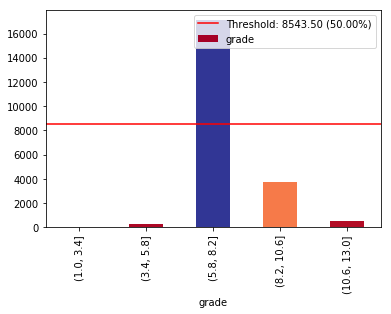

In [189]:
ims = xai.imbalance_plot(df, "grade")

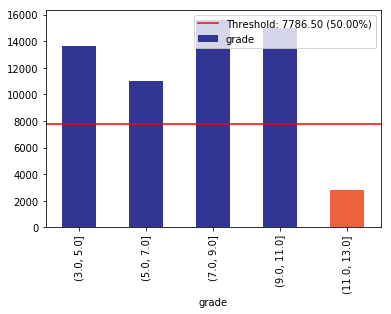

In [193]:
bal_df = xai.balance(df, "grade", upsample=0.8)